# Dissertation Code
## Predicting the effectiveness of video content marketing on social media platforms in the financial services sector.

This is the code that was used to produce the dissertation project for the client company Hub Tv. This code does NOT include all code from the data cleaning, dataset creation and primary data analysis, but starts of with the exploratory data analysis of the data (Chapter 3 of the dissertation).

In [1]:
#Importing some of the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Setting the random seed for replicability of results
np.random.seed(10)

#### Load in the Data

In [3]:
#load in the AMC data
amc=pd.read_csv('amc_data.csv')
amc

,VideoName,VideoTime,Seconds,Platform,Domain,USER,URL,Length,Views,Like,...,SocialReactions,ReTweets,Category,privacyStatus,language,audioLanguage,Dislikes,Favourites,Engagements,Unnamed: 30
0,X1032357650300595.mp4,0:02:26,146,FB,AMC,Henderson Investment Trust,https://en-gb.facebook.com/hendersoninvestment...,0:00,111.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X1034059566793827.mp4,0:05:27,327,FB,AMC,Henderson Investment Trust,https://en-gb.facebook.com/hendersoninvestment...,0:00,5169.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X1093863110778927.mp4,0:03:10,190,FB,AMC,Henderson Investment Trust,https://en-gb.facebook.com/hendersoninvestment...,0:00,11301.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,X197708641131280,0:00:21,21,FB,AMC,Henderson Investment Trust,https://en-gb.facebook.com/hendersoninvestment...,0:00,75.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,X2206652019345707.mp4,0:08:32,512,FB,AMC,Henderson Investment Trust,https://en-gb.facebook.com/hendersoninvestment...,0:00,10347.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17861,NaN,NaN,496,YT,NaN,Credit Suisse,https://www.youtube.com/watch?v=hxvyJTPmTvk,NaN,2781.0,NaN,...,NaN,NaN,Sports,public,NaN,NaN,2.0,0.0,12.0,NaN
17862,NaN,NaN,507,YT,NaN,Credit Suisse,https://www.youtube.com/watch?v=OuCZ5ZlE5-Y,NaN,8099.0,NaN,...,NaN,NaN,Sports,public,NaN,NaN,0.0,0.0,16.0,NaN
17863,NaN,NaN,108,YT,NaN,Credit Suisse,https://www.youtube.com/watch?v=HcI_NhXtklM,NaN,1200.0,NaN,...,NaN,NaN,Music,public,NaN,NaN,1.0,0.0,4.0,NaN
17864,NaN,NaN,154,YT,NaN,Credit Suisse,https://www.youtube.com/watch?v=xBA8I1CWJK8,NaN,58290.0,NaN,...,NaN,NaN,Sports,public,NaN,NaN,3.0,0.0,77.0,NaN


In [4]:
#load in the WMC data
wmc=pd.read_csv('wmc_data.csv')
wmc

,VideoName,VideoTime,Seconds,Platform,Domain,USER,URL,Length,Views,Like,...,Likes,SocialReactions,ReTweets,Category,Tags,audioLanguage,Dislikes,Favourites,Engagements,Unnamed: 29
0,X1001241283556739.mp4,0:00:21,21,FB,WMC,Investec,https://www.facebook.com/InvestecBank/videos/1...,0:00,183.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X1004957819602268.mp4,0:01:47,107,FB,WMC,Investec,https://www.facebook.com/InvestecBank/videos/1...,0:00,4742.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X1006547906404046.mp4,0:00:23,23,FB,WMC,Investec,https://www.facebook.com/InvestecBank/videos/1...,0:00,864.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,X1037348933029823.mp4,0:03:38,218,FB,WMC,Investec,https://www.facebook.com/InvestecBank/videos/1...,0:00,78767.0,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,X1063862240378492.mp4,0:03:39,219,FB,WMC,Investec,https://www.facebook.com/InvestecBank/videos/1...,0:00,772.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,NaN,NaN,23,YT,NaN,LGT Vestra,https://www.youtube.com/watch?v=89BgArqt7IY,NaN,211.0,2.0,...,NaN,NaN,NaN,People & Blogs,NaN,NaN,0.0,0.0,2.0,NaN
3328,NaN,NaN,43,YT,NaN,LGT Vestra,https://www.youtube.com/watch?v=72NriQztTZ8,NaN,163.0,1.0,...,NaN,NaN,NaN,People & Blogs,NaN,en-GB,0.0,0.0,1.0,NaN
3329,NaN,NaN,33,YT,NaN,LGT Vestra,https://www.youtube.com/watch?v=Xt86bwdx4eo,NaN,136.0,1.0,...,NaN,NaN,NaN,People & Blogs,NaN,en-GB,0.0,0.0,1.0,NaN
3330,NaN,NaN,311,YT,NaN,LGT Vestra,https://www.youtube.com/watch?v=FBr5TezlcuM,NaN,2730.0,9.0,...,NaN,NaN,NaN,People & Blogs,"LGT Vestra,London,Liechtenstein,cycle,Prince2P...",en-GB,0.0,0.0,10.0,NaN


From the above dataframes we see that there are many NaN values and differences in measurements. For example the beginning of the dataframe has videos from Facebook and their lengths are measured as 'VideoTime' and 'Seconds', while videos from YouTube are only measured in 'Seconds'. This is dealt with later on in this section.

Other columns also appear to contain unnecessary data with regards to the analysis we are setting out to conduct, which is why we take a closer look at the columns of these datasets to find, which features we wish to keep and which we wish to remove.

In [5]:
print(amc.columns)
print(wmc.columns)

Index(['VideoName', 'VideoTime', 'Seconds', 'Platform', 'Domain', 'USER',
       'URL', 'Length', 'Views', 'Like', 'Love', 'Wow', 'Haha', 'Angry', 'Sad',
       'Shares', 'Comments', 'Upload', 'Title', 'Description', 'Likes',
       'SocialReactions', 'ReTweets', 'Category', 'privacyStatus', 'language',
       'audioLanguage', 'Dislikes', 'Favourites', 'Engagements',
       'Unnamed: 30'],
      dtype='object')
Index(['VideoName', 'VideoTime', 'Seconds', 'Platform', 'Domain', 'USER',
       'URL', 'Length', 'Views', 'Like', 'Love', 'Wow', 'Haha', 'Angry', 'Sad',
       'Shares', 'Comments', 'Upload', 'Title', 'Description', 'Likes',
       'SocialReactions', 'ReTweets', 'Category', 'Tags', 'audioLanguage',
       'Dislikes', 'Favourites', 'Engagements', 'Unnamed: 29'],
      dtype='object')


The colummns of the two datasets appear to be very similar, with minor differences in AMC data containing a 'Unnamed: 30' column and WMC containing a 'Unnamed: 29' one caused by editing in Microsoft Excel.

In [6]:
#Load in the supportive analysis data
df3 = pd.read_csv('company_df.csv')

#Set Index to be the first column and drop its name
df3 = df3.set_index('Unnamed: 0')
df3.index.name = None

This data will be introduced and used later on this project.

### String Manipulation
We take a look at some of our categorical variables and see whether they need manipulation and tweaking.
#### See what companies are in the datasets


In [7]:
#companies in AMC Data
amc['USER'].sort_values().unique()

array(['ASInvestments', 'AXA Investment Managers', 'AXA on Instagram',
       'AXAIM', 'Aberdeen Standard Investments',
       'Aberdeen Standard Investments on Instagram',
       'Aberdeen Standard Investments’s Instagram video', 'Aegon',
       'Aegon UK', 'Aegon on Instagram', 'Allianz', 'Allianz Insurance',
       'Allianz UK', 'Amundi', 'Amundi_FR', 'Aon',
       'Aon Assessment Solutions', 'Aon_plc', 'Aviva', 'Aviva Investors',
       'Aviva UK', 'Aviva plc on Instagram', 'AvivaUK',
       'BMO Global Asset Management (EMEA)',
       'BMO Global Asset Management - EMEA', 'BMO on Instagram',
       'BMO’s Instagram video', 'BNP Paribas',
       'BNP Paribas Asset Management', 'BNPParibas', 'BNY Mellon',
       'BNY Mellon on Instagram', 'BNY Mellon’s Instagram post',
       'BNYMellon', 'Baillie Gifford', 'Baillie Gifford UK',
       'BaillieGifford', 'BlackRock', 'BlackRock on Instagram',
       'Blackstone', 'Blackstone on Instagram', 'CTinvest_EMEA',
       'Capital Group', 'Ca

In [8]:
#Companies in WMC Data
wmc['USER'].sort_values().unique()

array(['7IM', '7IMTV', '7IM_Updates', 'Barclays',
       'Barclays Wealth Management', 'Brewin Dolphin', 'Brooks Macdonald',
       'BrooksMacdonald', 'Brown Shipley', 'CGWM_UK',
       'Canaccord Genuity Wealth Management (UK, Channel Islands and Isle of Man)',
       'Canaccord Genuity Wealth Management, UK, Channel Islands and Isle of Man',
       'Charles Stanley & Co. Limited', 'Close Brothers', 'CloseBrothers',
       'Investec', 'James Hambro & Partners', 'Killik & Co',
       'Killik and Co.', 'KillikandCo', 'LGT Vestra', 'LGT Vestra LLP',
       'LGTvestra', 'Quilter Cheviot', 'Quilter Cheviot Ltd',
       'QuilterCheviot', 'Rathbone Brothers Plc', 'Rathbones1742',
       'Seven Investment Management LLP (7IM)', 'Smith & Williamson',
       'SmithWilliamson', "St. James's Place",
       'St. James’s Place Wealth Management', 'Tilney', 'Tilney Group',
       'TilneyGroup', '_CharlesStanley', 'barclayswealth',
       'brewindolphin', 'brownshipley', 'closebrothersgroup', 'invest

We can see a lot of redundancies of company names as they have different aliases for each different social media platform and they are thus redundant. We will now convert them into uniform names.

#### Editing the company names in AMC

In [9]:
amc = amc.replace(to_replace =['AXA on Instagram','AXAIM'],
                 value ="AXA Investment Managers")

amc = amc.replace(to_replace =['ASInvestments','AS Investments',"Aberdeen Standard Investments on Instagram",'Aberdeen Standard Investments’s Instagram video'],
                 value ="Aberdeen Standard Investments")

amc = amc.replace(to_replace =["Aegon UK", 'Aegon on Instagram'],
                 value ="Aegon")

amc = amc.replace(to_replace =["Allianz UK", "Allianz Insurance UK", "Allianz Australia Insurance Ltd", 'Allianz Insurance'],
                 value ="Allianz")

amc = amc.replace(to_replace =["Amundi HongKong", "Amundi_FR", 'My Amundi on Instagram'],
                 value ="Amundi")

amc = amc.replace(to_replace =["Aon_plc",'Aon Assessment Solutions'],
                 value ="Aon")

amc = amc.replace(to_replace =['Aviva UK','Aviva plc on Instagram', 'AvivaUK','Aviva Investors'],
                 value ="Aviva")

amc = amc.replace(to_replace =["BMO Global Asset Management (EMEA)","BMO Global Asset Management - EMEA",'BMO on Instagram','BMO’s Instagram video'],
                 value ="BMO")

amc = amc.replace(to_replace =["BNP",'BNP Paribas Asset Management',"BNP Paribas ", "BNPParibas",'BNP Paribas Leasing Solutions UK'],
                 value ="BNP Paribas")

amc = amc.replace(to_replace =['BNY Mellon on Instagram','BNY Mellon’s Instagram post', 'BNYMellon'],
                 value ="BNY Mellon")

amc = amc.replace(to_replace =['BaillieGifford','Baillie Gifford UK'],
                 value = 'Baillie Gifford')

amc = amc.replace(to_replace =["Black Rock", 'BlackRock on Instagram', 'blackrock', 'Blackrock'],
                 value = 'BlackRock')

amc = amc.replace(to_replace = ['Blackstone on Instagram', 'blackstone'],
                 value = 'Blackstone')

amc = amc.replace(to_replace = ['Life at Capital Group', 'Life at Capital Group on Instagram','CapitalGroup'],
                 value = 'Capital Group')

amc = amc.replace(to_replace =['CT Invest','Columbia Threadneedle Investments EMEA APAC','Columbia Threadneedle on Instagram','CTinvest_EMEA'],
                 value = 'Columbia Threadneedle')

amc = amc.replace(to_replace =['Credit Suisse Careers on Instagram','Credit Suisse Careers’s Instagram post','Credit Suisse Careers’s Instagram profile post', 'CreditSuisse'],
                 value ='Credit Suisse')

amc = amc.replace(to_replace = 'Fidelity Investments',
                 value = 'Fidelity')

amc = amc.replace(to_replace = 'FranklinTempletonTV',
                 value = 'Franklin Templeton')

amc = amc.replace(to_replace =['Goldman Sachs on Instagram', 'Goldman Sachs’s Instagram photo',
       'Goldman Sachs’s Instagram post',
       'Goldman Sachs’s Instagram profile post', 'GoldmanSachs'],
                 value ='Goldman Sachs')

amc = amc.replace(to_replace = ['Henderson Investment Trust','Janus Henderson Investment Trusts'],
                 value = 'Janus Henderson Investment Trust')

amc = amc.replace(to_replace = ['HSBC Global Asset Management','HSBC UK'],
                 value = 'HSBC')

amc = amc.replace(to_replace = ['Invesco US', 'InvescoUS'],
                 value = 'Invesco')

amc = amc.replace(to_replace = [ 'J.P. Morgan on Instagram',
       'J.P. Morgan’s Instagram profile post',
       'JPMorgan Chase & Co.', 'jpmorgan'],
        value = 'JP Morgan')

amc = amc.replace(to_replace ='JupiterAM_UK',
                 value = 'Jupiter Asset Management')

amc = amc.replace(to_replace =['LGIM', 'Legal & General Investment Management (LGIM)','Legal & General',
       'Legal & General Investment Management - LGIM'],
        value = 'Legal and General')

amc = amc.replace(to_replace =['Legg Mason on Instagram', 'leggmason'],
                 value = 'Legg Mason')

amc = amc.replace(to_replace =["mandgprof", "Mandg investments"],
                 value = 'M&G Investments')

amc = amc.replace(to_replace ='ManGroup',
                 value = 'Man Group')

amc = amc.replace(to_replace =['Natixis Global', 'Natixis Investment Managers', 'Natixis Investment Managers US',
       'NatixisIM'],
       value = 'Natixis')

amc = amc.replace(to_replace =['RLAM UK','RLAM_UK', 'Royal London', 'RoyalLondon'],
                 value = 'Royal London Asset Management')

amc = amc.replace(to_replace ='Royal London Circket',
                 value = 'Royal London Cricket')

amc = amc.replace(to_replace =['Santander Asset Management','SantanderAM','Santander Asset Management UK'],
                 value = 'Santander')

amc = amc.replace(to_replace ='Schroders IM',
                 value = 'Schroders')

amc = amc.replace(to_replace = ['StateStreetGA', 'State Street'],
                 value = 'State Street Global Advisors')

amc = amc.replace(to_replace =['T. Rowe Price on Instagram', 'TRowePrice', 'T Rowe Price'],
                 value = 'T. Rowe Price')

amc = amc.replace(to_replace =["UBS Global", 'UBS Asset Management'],
                 value = 'UBS')

amc = amc.replace(to_replace ='Vanguard_UK',
                 value = 'Vanguard')

In [10]:
#Check the list of company names now
print(amc['USER'].sort_values().unique())

#Number of unique companies in AMC
len(amc['USER'].sort_values().unique())

['AXA Investment Managers' 'Aberdeen Standard Investments' 'Aegon'
 'Allianz' 'Amundi' 'Aon' 'Aviva' 'BMO' 'BNP Paribas' 'BNY Mellon'
 'Baillie Gifford' 'BlackRock' 'Blackstone' 'Capital Group'
 'Columbia Threadneedle' 'Credit Suisse' 'Fidelity' 'Franklin Templeton'
 'Goldman Sachs' 'HSBC' 'Invesco' 'JP Morgan'
 'Janus Henderson Investment Trust' 'Jupiter Asset Management'
 'Legal and General' 'Legg Mason' 'M&G Investments' 'Man Group' 'Natixis'
 'Nomura' 'Royal London Asset Management' 'Royal London Cricket'
 'Santander' 'Schroders' 'State Street Global Advisors' 'T. Rowe Price'
 'UBS' 'Vanguard']


38

We see that all redundancies and duplicat data are removed.

#### Do the same for WMC Data

In [11]:
wmc = wmc.replace(to_replace =['7IMPage','7IMTV','7IM_Updates','Seven Investment Management LLP (7IM)'],
                 value ="7IM")

wmc = wmc.replace(to_replace =['Barclays Wealth Management','barclayswealth'],
                 value ="Barclays")

wmc = wmc.replace(to_replace =['BrewinDolphin', 'brewindolphin'],
                 value ="Brewin Dolphin")

wmc = wmc.replace(to_replace =['brownshipley'],
                 value ="Brown Shipley")

wmc = wmc.replace(to_replace =['BrooksMacdonald'],
                 value ='Brooks Macdonald')

wmc = wmc.replace(to_replace =['CGWM_UK','Canaccord Genuity Wealth Management (UK, Channel Islands and Isle of Man)',
       'Canaccord Genuity Wealth Management, UK, Channel Islands and Isle of Man'],
        value ="Canaccord Genuity Wealth Management")

wmc = wmc.replace(to_replace =['CharlesStanley','_CharlesStanley', 'Charles Stanley'],
                 value ="Charles Stanley & Co. Limited")

wmc = wmc.replace(to_replace =['closebrothersgroup','CloseBrothers'],
                 value ="Close Brothers")

wmc = wmc.replace(to_replace ='investec',
                 value ="Investec")

wmc = wmc.replace(to_replace =['killikandco','Killikandco', 'KillikandCo', 'Killik & Co'],
                 value ="Killik and Co.")

wmc = wmc.replace(to_replace =['LGT Vestra LLP', 'LGTvestra'],
                 value ="LGT Vestra")

wmc = wmc.replace(to_replace =['Quilter Cheviot Ltd','Quiltercheviot','quiltercheviot','QuilterCheviot'],
                 value ="Quilter Cheviot")

wmc = wmc.replace(to_replace =['Rathbones1742', 'Rathbone Brothers Plc', 'Rathbones'],
                 value ="Rathbone Brothers")

wmc = wmc.replace(to_replace ='SmithWilliamson',
                 value ="Smith & Williamson")

wmc = wmc.replace(to_replace =['St. James Place','sjpwealth', 'St. James’s Place Wealth Management'],
                 value ="St. James's Place")

wmc = wmc.replace(to_replace =['Tilney','TilneyGroup'],
                 value ="Tilney Group")


In [12]:
#Check the list of company names now
print(wmc['USER'].sort_values().unique())

#Number of unique companies in WMC
len(wmc['USER'].sort_values().unique())

['7IM' 'Barclays' 'Brewin Dolphin' 'Brooks Macdonald' 'Brown Shipley'
 'Canaccord Genuity Wealth Management' 'Charles Stanley & Co. Limited'
 'Close Brothers' 'Investec' 'James Hambro & Partners' 'Killik and Co.'
 'LGT Vestra' 'Quilter Cheviot' 'Rathbone Brothers' 'Smith & Williamson'
 "St. James's Place" 'Tilney Group']


17

#### Combine the two datasets

In [13]:
data = pd.concat([amc, wmc], axis = 0)
data.shape

(21198, 33)

In [14]:
### Reindex the data after combining since otherwise we will have duplicated index values and inconcistencies
data = data.reset_index()

In [15]:
data

,index,VideoName,VideoTime,Seconds,Platform,Domain,USER,URL,Length,Views,...,Category,privacyStatus,language,audioLanguage,Dislikes,Favourites,Engagements,Unnamed: 30,Tags,Unnamed: 29
0,0,X1032357650300595.mp4,0:02:26,146,FB,AMC,Janus Henderson Investment Trust,https://en-gb.facebook.com/hendersoninvestment...,0:00,111.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,X1034059566793827.mp4,0:05:27,327,FB,AMC,Janus Henderson Investment Trust,https://en-gb.facebook.com/hendersoninvestment...,0:00,5169.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,X1093863110778927.mp4,0:03:10,190,FB,AMC,Janus Henderson Investment Trust,https://en-gb.facebook.com/hendersoninvestment...,0:00,11301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,X197708641131280,0:00:21,21,FB,AMC,Janus Henderson Investment Trust,https://en-gb.facebook.com/hendersoninvestment...,0:00,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,X2206652019345707.mp4,0:08:32,512,FB,AMC,Janus Henderson Investment Trust,https://en-gb.facebook.com/hendersoninvestment...,0:00,10347.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21193,3327,NaN,NaN,23,YT,NaN,LGT Vestra,https://www.youtube.com/watch?v=89BgArqt7IY,NaN,211.0,...,People & Blogs,NaN,NaN,NaN,0.0,0.0,2.0,NaN,NaN,NaN
21194,3328,NaN,NaN,43,YT,NaN,LGT Vestra,https://www.youtube.com/watch?v=72NriQztTZ8,NaN,163.0,...,People & Blogs,NaN,NaN,en-GB,0.0,0.0,1.0,NaN,NaN,NaN
21195,3329,NaN,NaN,33,YT,NaN,LGT Vestra,https://www.youtube.com/watch?v=Xt86bwdx4eo,NaN,136.0,...,People & Blogs,NaN,NaN,en-GB,0.0,0.0,1.0,NaN,NaN,NaN
21196,3330,NaN,NaN,311,YT,NaN,LGT Vestra,https://www.youtube.com/watch?v=FBr5TezlcuM,NaN,2730.0,...,People & Blogs,NaN,NaN,en-GB,0.0,0.0,10.0,NaN,"LGT Vestra,London,Liechtenstein,cycle,Prince2P...",NaN


In [16]:
#See what the columns look like now
data.columns

Index(['index', 'VideoName', 'VideoTime', 'Seconds', 'Platform', 'Domain',
       'USER', 'URL', 'Length', 'Views', 'Like', 'Love', 'Wow', 'Haha',
       'Angry', 'Sad', 'Shares', 'Comments', 'Upload', 'Title', 'Description',
       'Likes', 'SocialReactions', 'ReTweets', 'Category', 'privacyStatus',
       'language', 'audioLanguage', 'Dislikes', 'Favourites', 'Engagements',
       'Unnamed: 30', 'Tags', 'Unnamed: 29'],
      dtype='object')

#### Impute NA values before manipulating other columns

In [17]:
#Looking at how many NA values each feature has
data.isna().sum()

index                  0
VideoName          15107
VideoTime          15107
Seconds                0
Platform               0
Domain             15107
USER                   0
URL                    0
Length             15124
Views               1223
Like               14552
Love               16974
Wow                16974
Haha               16974
Angry              16974
Sad                16974
Shares             16974
Comments               2
Upload                37
Title               1852
Description          775
Likes               7870
SocialReactions    19981
ReTweets           20692
Category            6091
privacyStatus       8514
language           18915
audioLanguage      13976
Dislikes            6091
Favourites          6091
Engagements         6091
Unnamed: 30        21198
Tags               19109
Unnamed: 29        21198
dtype: int64

In [18]:
#Replace all NA values with 0 for cleaning purposes. Having 0 values will also help us in the coming feature engineering 
data = data.fillna(0)

#### Removing unnecessary columns
Obviously unnecessary or unusable ones

In [19]:
data.drop(['index','VideoName','VideoTime','Domain', 'URL',
           'privacyStatus','Tags', 'Unnamed: 30', 'Unnamed: 29',
           'Description', 'Upload'], axis=1, inplace=True)

#### Language

In [20]:
#Remove 'language' due to duplicate data with 'audioLanguage'
data.drop(['language'], axis=1, inplace=True)

In [21]:
#See which languages we have in our dataset and the number of videos uploaded in that language
data['audioLanguage'].value_counts()

0          13976
en          2942
en-GB       2537
fr          1039
en-US        411
de            67
zxx           54
it            45
zh-HK         27
pl            16
es-ES         16
pt-PT         13
es            13
id            10
de-DE          6
nl             5
pt-BR          4
tr             3
en-IN          3
zh             2
nl-NL          2
pt             2
nl-BE          1
zh-Hans        1
es-419         1
fr-FR          1
yue-HK         1
Name: audioLanguage, dtype: int64

Most of the videos do not have a labelled language attached to them due to the crawling difficulties of this data. Despite this however, for the sake of the clarity of our analysis, we will assume that the videos with no specific language attached to them (which have a '0' - value) are in English (GB), as many of our companies are from the United Kingdom and most of this advertisement content is in english.

In [22]:
#Turn these into comprehensible language codes
data['audioLanguage'] = data['audioLanguage'].replace(to_replace =['en', 'en-GB',0, 'en-IN',],
                 value ="English (GB)")

data = data.replace(to_replace =['en-US'],
                 value ="English (US)")

data = data.replace(to_replace =['fr', 'fr-FR'],
                 value ="French")

data = data.replace(to_replace =['de', 'de-DE'],
                 value ="German")

data = data.replace(to_replace =['zxx'],
                 value ="No Language")

data = data.replace(to_replace =['it'],
                 value ="Italian")

data = data.replace(to_replace =['zh-HK'],
                 value ="Cantonese")

data = data.replace(to_replace =['pl'],
                 value ="Polish")

data = data.replace(to_replace =['es-ES', 'es'],
                 value ="Spanish")

data = data.replace(to_replace =['pt-PT','pt', 'pt-BR'],
                 value ="Portugese")

data = data.replace(to_replace =['en-IN', 'nl', 'nl-NL','nl-BE','yue-HK', 'zh-Hans', 'es-419', 'tr', 'zh', 'id'],
                 value ="Other Languages")


In [23]:
#After imputing 0 into English and decoding all the abbreviations into more understandable ones, we check the distribution of videos across all languages
data['audioLanguage'].value_counts()

English (GB)       19458
French              1040
English (US)         411
German                73
No Language           54
Italian               45
Spanish               29
Cantonese             27
Other Languages       26
Portugese             19
Polish                16
Name: audioLanguage, dtype: int64

In [24]:
#Change to a cleaner name
data.rename(columns={'audioLanguage': 'Audio Language'}, inplace=True)

### Feature Engineering
In this part we will turn to feature engineering, tuning and further modification

#### Turn string-numbers into integers as they turned into strings during the crawling process

In [25]:
list1 = data['Likes'].to_list()
list1 = [str(i) for i in list1]
len(list1)

21198

In [26]:
# Turn Twitter's strings into numbers.
#This is because twitter marks likes with letters, such as 1.6K means 1600, and 1.2M mean 1200000.
list2 = []

def convert_str_to_number(x):
    total_stars = 0
    num_map = {'K':1000, 'M':1000000, 'B':1000000000}
    for i in x:
        if i.isdigit():
            total_stars = int(i)
        else:
            if len(i) > 1:
                total_stars = float(i[:-1]) * num_map.get(i[-1].upper(), 1)
        list2.append(total_stars)

convert_str_to_number(list1)


In [27]:
#Test this by checking the average likes on twitter
sum(list2) / len(list2)

11.238796112840834

In [28]:
#Replace the old 'Likes' column with the updated one
data['Likes'] = list2

In [29]:
#See what the most liked video was
data.iloc[data['Likes'].idxmax(), :]

Seconds                                                          198
Platform                                                          YT
USER                                                   Credit Suisse
Length                                                             0
Views                                                      9640115.0
Like                                                             0.0
Love                                                             0.0
Wow                                                              0.0
Haha                                                             0.0
Angry                                                            0.0
Sad                                                              0.0
Shares                                                           0.0
Comments                                                      4443.0
Title              Federer and Nadal: Fit of Laughter During Shoo...
Likes                             

#### Aggregating Engagements and making engagement categories
Here we combine the different engagement types into three main categories of:

'Positive Easy Engagements' - which are positive by nature and take the least effort (clicks & psychological effort) to undertake

'Negative Easy Engagments' - which are negative by nature and take the least effort (clicks & psychological effort) to undertake

'Positive Strong Engagements' - which are positive by nature and take the most effort (clicks & psychological effort) to undertake

In [30]:
data['Positive Easy Engagements'] = data['Like'] + data['Love'] + data['Wow'] + data['Haha'] + data['Likes'] + data['Engagements'] + data['SocialReactions']
data['Negative Easy Engagements'] = data['Angry'] + data['Sad'] + data['Dislikes'] 
data['Positive Strong Engagements'] = data['Comments'] + data['Shares'] + data['Favourites'] + data['ReTweets']
data['Total Engagements'] = data['Positive Easy Engagements'] + data['Negative Easy Engagements'] + data['Positive Strong Engagements']
data['Engagement Ratio'] = data['Total Engagements'] / data['Views']

Now we drop the engagement features, which we have aggregated and combined

In [31]:
#Drop the engagement data that we now already have encoded. and the other unnecessary ones
data.drop(['Like','Love', 'Wow', 'Haha', 'Likes',
           'Angry','Sad', 'Dislikes',
           'Shares', 'Favourites', 'Comments',
           'SocialReactions', 'ReTweets',
           'Dislikes', 'Engagements'], axis = 1, inplace = True)

#### Fixing missing incorrect 'Views'-values
We will now impute 0 values for views which are incorrectly 0

In [32]:
#Seeing how many videos have 0 views and what platform are they on
zeroes = data[data['Views'] == 0]
zeroes['Platform'].value_counts()

LK    1221
FB     473
IN      13
YT       1
Name: Platform, dtype: int64

We can see that Linkedin has 0 views on all of its videos. This is a crawling error, as this data is just not available to us. We fix this by imputing the views based on the median number of views per engagement on Facebook (as it is closest to LinkedIn in terms of engagements):

Turning infinity values into nan and then into 0 as these were created in the cases where videos had engagements and 0 views (which is impossible)

In [33]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.fillna(0)

In [34]:
fb_videos = data[data['Platform'] == 'FB']
round(fb_videos['Views'].median() / fb_videos['Total Engagements'].median())

63

Creating a new column in which, if a video has 0 views then its replaced by the number of engagements it has times 63, if it has more than 0 views, then it stays the same

In [35]:
data['engagement_views'] = np.where(data['Views']== 0, data['Total Engagements']*63, data['Views'])
data['engagement_views'].value_counts().sort_index()

0.0          25
1.0           4
2.0           1
3.0           5
4.0           5
             ..
4192356.0     1
4212125.0     1
6808705.0     1
7310232.0     1
9640115.0     1
Name: engagement_views, Length: 7166, dtype: int64

In [36]:
#Replacing the old 'Views' column with the newly engineered 'engagement_views'. Then drop the new column as it is not necessary anymore
data['Views'] = data['engagement_views']
data.drop('engagement_views', axis=1, inplace=True)

In [37]:
#Now check again, which videos have 0 views
zeroes = data[data['Views'] == 0]
zeroes['Platform'].value_counts()

FB    19
LK     5
YT     1
Name: Platform, dtype: int64

#### Creating Dummy Variables
We now turn our categorical variables into dummy variables. This includes the features: Platform, Category and Audio Language

In [38]:
#df2 is a copy our original cleaned data with no encoded/dummy features
df2 = data

In [39]:
#We can see that platforms, categories and languages can be encoded into dummy features
platforms = pd.get_dummies(data['Platform'])

data['Category'] = data['Category'].replace(to_replace =[0], value ="No Category") #Correct the '0' into more comprehensible 'No Category Feature'
category = pd.get_dummies(data['Category'])

languages = pd.get_dummies(data['Audio Language'])

#notice we save data as df now for easier editing. now 'df' is the dataframe we will be working on mostly.
df = pd.concat([data,platforms,category,languages], axis = 1)

#### Drop the remaining unnecessary columns from the modeling data

In [40]:
#See what the data looks like
df

,Seconds,Platform,USER,Length,Views,Title,Category,Audio Language,Positive Easy Engagements,Negative Easy Engagements,...,English (GB),English (US),French,German,Italian,No Language,Other Languages,Polish,Portugese,Spanish
0,146,FB,Janus Henderson Investment Trust,0:00,111.0,Janus Henderson Investment Trusts - Trust TV: ...,No Category,English (GB),4.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,327,FB,Janus Henderson Investment Trust,0:00,5169.0,Janus Henderson Investment Trusts - A mixed ba...,No Category,English (GB),54.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,190,FB,Janus Henderson Investment Trust,0:00,11301.0,Watch City of London Investment Trust... - Jan...,No Category,English (GB),12.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,21,FB,Janus Henderson Investment Trust,0:00,75.0,REGISTER for the next... - Janus Henderson Inv...,No Category,English (GB),2.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,512,FB,Janus Henderson Investment Trust,0:00,10347.0,Janus Henderson Investment Trusts - Taking adv...,No Category,English (GB),26.0,1.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21193,23,YT,LGT Vestra,0,211.0,Vlog: Day 1 Buckingham Palace,People & Blogs,English (GB),4.0,0.0,...,1,0,0,0,0,0,0,0,0,0
21194,43,YT,LGT Vestra,0,163.0,Vlog: Day 1 challenges,People & Blogs,English (GB),2.0,0.0,...,1,0,0,0,0,0,0,0,0,0
21195,33,YT,LGT Vestra,0,136.0,Vlog: Day 1 complete,People & Blogs,English (GB),2.0,0.0,...,1,0,0,0,0,0,0,0,0,0
21196,311,YT,LGT Vestra,0,2730.0,LGT Vestra #ridePrincetoPrince,People & Blogs,English (GB),19.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [41]:
#Drop the engagement data that we now already have encoded. and the other unnecessary ones
df.drop(['Platform','USER', 'Length','Title','Category','Audio Language','Total Engagements'], axis = 1, inplace = True)

In [42]:
#Check what columns we are still left with
df.columns

Index(['Seconds', 'Views', 'Positive Easy Engagements',
       'Negative Easy Engagements', 'Positive Strong Engagements',
       'Engagement Ratio', 'FB', 'IN', 'LK', 'TW', 'YT', 'Autos & Vehicles',
       'Comedy', 'Education', 'Entertainment', 'Film & Animation',
       'Howto & Style', 'Music', 'News & Politics', 'No Category',
       'Nonprofits & Activism', 'People & Blogs', 'Science & Technology',
       'Sports', 'Travel & Events', 'Cantonese', 'English (GB)',
       'English (US)', 'French', 'German', 'Italian', 'No Language',
       'Other Languages', 'Polish', 'Portugese', 'Spanish'],
      dtype='object')

### Create a target feature
We now create our target feature of effectiveness. The feature is called 'Effective' and it will take a value of 1 if the video is in the top 25th percentile in views and engagement ratio.

In [43]:
#See where the line is drawn in views
np.percentile(df['Views'], 75)

3125.25

In [44]:
#See where the line is drawn in engagement ratio
np.percentile(df['Engagement Ratio'], 75)

0.014753817137371951

In [45]:
# Use the two above measures to give 'effective'-labels
df['Effective'] = np.where((df['Views'] > np.percentile(df['Views'], 75)) & df['Engagement Ratio'] > np.percentile(df['Engagement Ratio'], 75), 1, 0)
df

,Seconds,Views,Positive Easy Engagements,Negative Easy Engagements,Positive Strong Engagements,Engagement Ratio,FB,IN,LK,TW,...,English (US),French,German,Italian,No Language,Other Languages,Polish,Portugese,Spanish,Effective
0,146,111.0,4.0,0.0,0.0,0.036036,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,327,5169.0,54.0,1.0,0.0,0.010640,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,190,11301.0,12.0,0.0,0.0,0.001062,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,21,75.0,2.0,0.0,0.0,0.026667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,512,10347.0,26.0,1.0,0.0,0.002609,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21193,23,211.0,4.0,0.0,0.0,0.018957,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21194,43,163.0,2.0,0.0,0.0,0.012270,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21195,33,136.0,2.0,0.0,0.0,0.014706,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21196,311,2730.0,19.0,0.0,1.0,0.007326,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df['Effective'].value_counts()

0    18242
1     2956
Name: Effective, dtype: int64

## Chapter 3. The Data and Methodology
Now we can start analysing the data and conducting exploratory data analysis

#### Summary Statistics of all fetures

In [47]:
df.describe().transpose().to_csv(r'Summary Statistics.csv')
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Seconds,21198.0,284.719691,590.852231,0.0,61.0,125.000000,240.000000,24657.0
Views,21198.0,23657.943580,164813.323252,0.0,255.0,981.000000,3125.250000,9640115.0
Positive Easy Engagements,21198.0,43.326446,919.689602,0.0,0.0,4.000000,20.000000,126974.0
Negative Easy Engagements,21198.0,1.229031,18.229830,0.0,0.0,0.000000,0.000000,2169.0
Positive Strong Engagements,21198.0,0.976602,31.554252,0.0,0.0,0.000000,0.000000,4443.0
Engagement Ratio,21198.0,0.011119,0.022118,0.0,0.0,0.003428,0.014754,0.6
FB,21198.0,0.199358,0.399527,0.0,0.0,0.000000,0.000000,1.0
IN,21198.0,0.006510,0.080424,0.0,0.0,0.000000,0.000000,1.0
LK,21198.0,0.057600,0.232991,0.0,0.0,0.000000,0.000000,1.0
TW,21198.0,0.023870,0.152648,0.0,0.0,0.000000,0.000000,1.0


#### Views and engagements by Categories

Text(0.5, 0, 'Views')

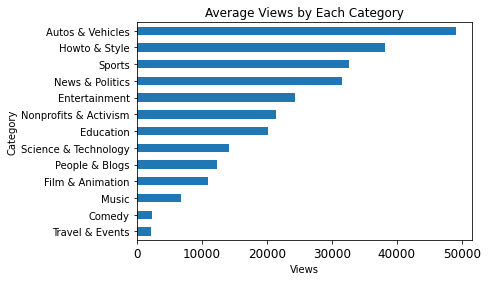

In [48]:
categories = data[data['Category']!='No Category']

views_by_user = categories.groupby('Category')['Views'].mean().sort_values()

views_by_user.plot(kind='barh')

plt.xticks(fontsize = 12, horizontalalignment = 'center')

plt.title('Average Views by Each Category')
plt.xlabel('Views')

Text(0.5, 0, 'Engagement Ratio')

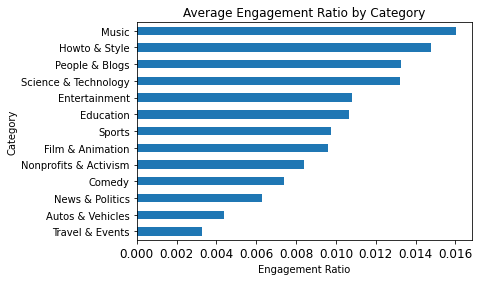

In [49]:
categories = data[data['Category']!='No Category']

views_by_user = categories.groupby('Category')['Engagement Ratio'].mean().sort_values()

views_by_user.plot(kind='barh')

plt.xticks(fontsize = 12, horizontalalignment = 'center')

plt.title('Average Engagement Ratio by Category')
plt.xlabel('Engagement Ratio')


#### Languages

Text(0.5, 0, 'Views')

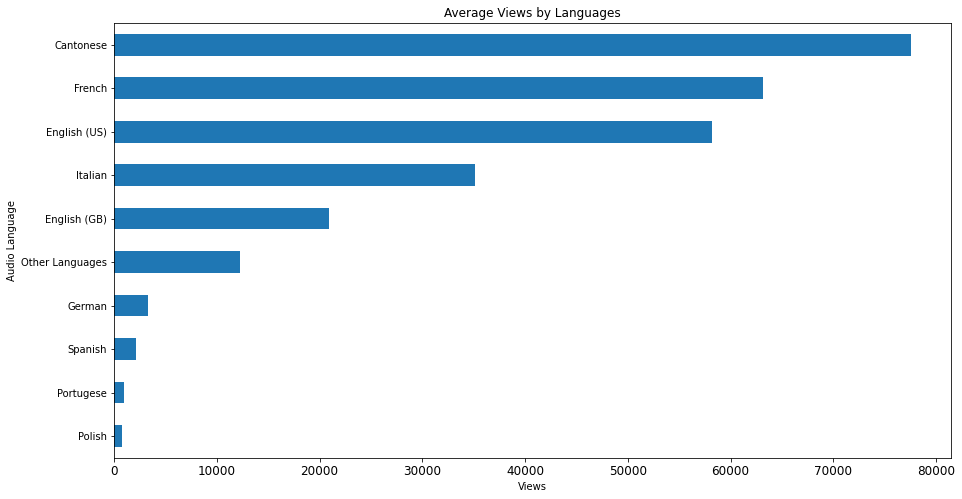

In [50]:
#Views by Languages
plt.rcParams['figure.figsize']=15,8

languages = data[data['Audio Language']!='No Language']

views_by_user = languages.groupby('Audio Language')['Views'].mean().sort_values()

views_by_user.plot(kind='barh')

plt.xticks(fontsize = 12, horizontalalignment = 'center')

plt.title('Average Views by Languages')
plt.xlabel('Views')

Text(0.5, 0, 'Engagement Ratio')

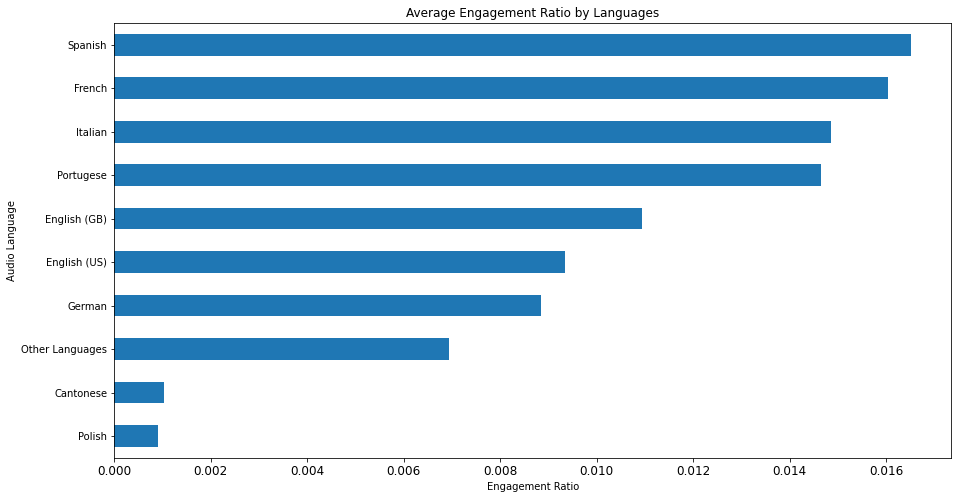

In [51]:
#Engagements by Languages
plt.rcParams['figure.figsize']=15,8

languages = data[data['Audio Language']!='No Language']

views_by_user = languages.groupby('Audio Language')['Engagement Ratio'].mean().sort_values()

views_by_user.plot(kind='barh')

plt.xticks(fontsize = 12, horizontalalignment = 'center')

plt.title('Average Engagement Ratio by Languages')
plt.xlabel('Engagement Ratio')

There is once again a significant difference between the most viewed videos by language and their engagement ratios. We see that Spanish and French videos have the highest proportional engagements from all languages

However we must stress that there is a great difference in the number of videos uploaded in these languages. French seems to gain high engagements with relatively high number of videos, however these are mainly uploaded by the company called BNP Paribas, which might also skew the data.

In [52]:
data['Audio Language'].value_counts()

English (GB)       19458
French              1040
English (US)         411
German                73
No Language           54
Italian               45
Spanish               29
Cantonese             27
Other Languages       26
Portugese             19
Polish                16
Name: Audio Language, dtype: int64

#### Platforms and videos

In [53]:
video_counts = df2['Platform'].value_counts()
platforms = ['Youtube \n' + str(video_counts[0]) + ' (' + str(round(video_counts[0]/len(df)*100,2)) + '%)',
             'Facebook \n' + str(video_counts[1]) + ' (' + str(round(video_counts[1]/len(df)*100,2)) + '%)',
             'LinkedIn \n' + str(video_counts[2]) + ' (' + str(round(video_counts[2]/len(df)*100,2)) + '%)',
             'Twitter \n' + str(video_counts[3]) + ' (' + str(round(video_counts[3]/len(df)*100,2)) + '%)',
             'Instagram \n' + str(video_counts[4]) + ' (' + str(round(video_counts[4]/len(df)*100,2)) + '%)']
video_counts

YT    15107
FB     4226
LK     1221
TW      506
IN      138
Name: Platform, dtype: int64

Text(0.5, 1.0, 'Distribution of Videos by Platforms')

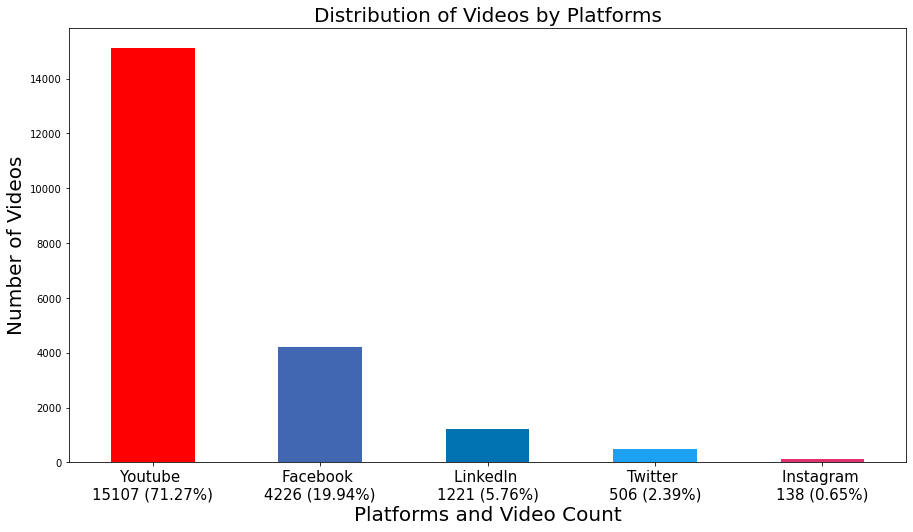

In [54]:
plt.rcParams['figure.figsize']=15,8
fig, ax = plt.subplots()

video_counts.plot(kind='bar', color=['#FF0000', '#4267B2','#0072b1', '#1DA1F2', '#E1306C'])

plt.xticks(fontsize = 15, horizontalalignment = 'center', rotation = 0)

ax.set_xticklabels(platforms)


plt.ylabel('Number of Videos', fontsize = 20)
plt.xlabel('Platforms and Video Count', fontsize = 20)
plt.title('Distribution of Videos by Platforms', fontsize = 20)

#### The dependent variable

In [55]:
dv = df['Effective'].value_counts()
dv = pd.DataFrame(dv)
dv = dv.rename(columns={'Effective':'Count'},index={0: 'Ineffective', 1:'Effective'})
dv['index'] = [0,1]
dv=dv.set_index('index')
dv['Label'] = ['Ineffective', 'Effective']
dv

,Count,Label
index,,
0,18242,Ineffective
1,2956,Effective


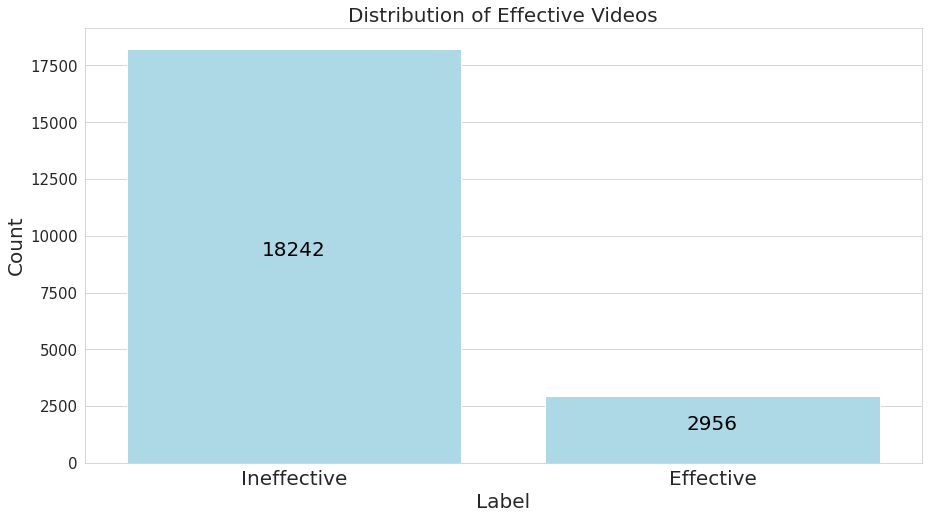

In [56]:
import seaborn as sns
sns.set_style("whitegrid")

ax = sns.barplot(x=dv.Label, y=dv.Count, color = '#ADD8E6', saturation =1.5)

plt.xlabel("Label", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Distribution of Effective Videos", fontsize = 20)
plt.xticks(fontsize = 20, horizontalalignment = 'center')
plt.yticks(fontsize = 15)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(int(height), (x + width/2, y + height*0.5), ha='center', fontsize = '20', color = 'black')
plt.show()

In [57]:
print('Minority class percentage is: ', round((2956 / 21198)*100, 2),'%')

Minority class percentage is:  13.94 %


In [58]:
print('Miajority class percentage is: ', round(100 - 13.94, 2),'%')

Miajority class percentage is:  86.06 %


### Scatter Plot of Effective and Ineffective Videos By Views and Engagement Ratio
##### This plot shows the distribution of our dependent variable and its two classes.

In [59]:
top10 = df[df['Views'] > np.percentile(df['Views'], 90)]
print('The number of videos dropped for the following visual due to high viewership: ',len(top10))

The number of videos dropped for the following visual due to high viewership:  2120


In [60]:
top10['Effective'].value_counts()

0    1129
1     991
Name: Effective, dtype: int64

Although these dropped videos have very high views, most of them are still labelled ineffective as their engagement ratio is not high enough.

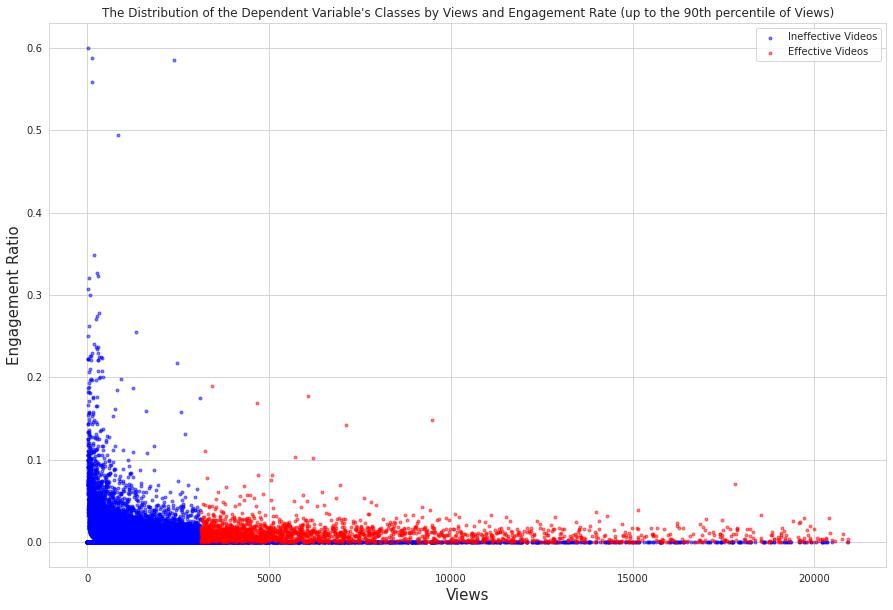

In [61]:
### Scatter Plot of Effective and Ineffective Videos By Views and Engagement Ratio
z = df[df['Views'] < np.percentile(df['Views'], 90)]
z = z[z['Engagement Ratio']<1]

ineffective = z[z['Effective']==0]
effective = z[z['Effective']==1]


fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(ineffective['Views'], ineffective['Engagement Ratio'], c='b',alpha =0.5, marker='.', label="Ineffective Videos")
ax.scatter(effective['Views'], effective['Engagement Ratio'], c='r', alpha =0.5, marker='.', label="Effective Videos")

ax.legend()
plt.title('The Distribution of the Dependent Variable\'s Classes by Views and Engagement Rate (up to the 90th percentile of Views)')
plt.xlabel("Views", fontsize=15)
plt.ylabel("Engagement Ratio", rotation=90, fontsize=15)
plt.show()


#### Engagement Ratio

In [62]:
from math import log10, floor
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [63]:
max(df['Engagement Ratio'])

0.6

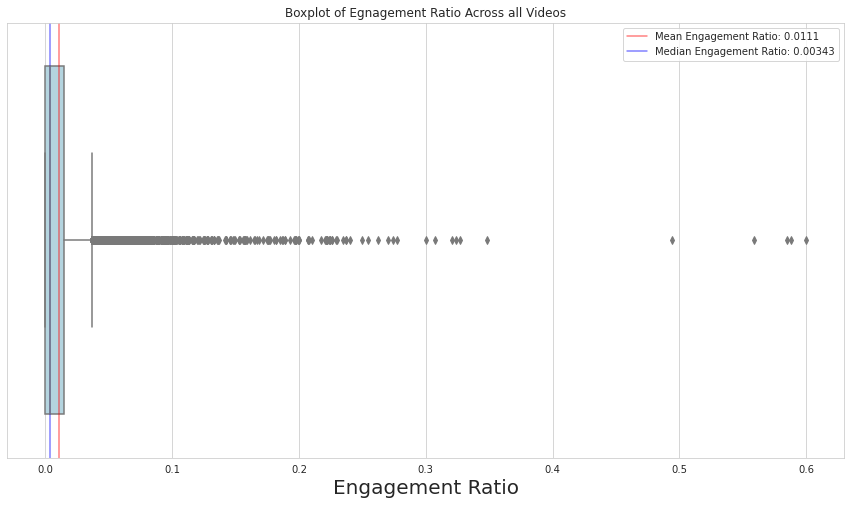

In [64]:
sns.boxplot(x=df['Engagement Ratio'], color='#ADD8E6')

plt.axvline(x=df['Engagement Ratio'].mean(), color = 'red', alpha = 0.5, label = 'Mean Engagement Ratio: ' +  str(round_sig(df['Engagement Ratio'].mean(), 3)))
plt.axvline(x=df['Engagement Ratio'].median(), color = 'blue', alpha = 0.5, label = 'Median Engagement Ratio: ' +  str(round_sig(df['Engagement Ratio'].median(), 3)))


plt.xlabel('Engagement Ratio',fontsize=20)

plt.title('Boxplot of Egnagement Ratio Across all Videos')
plt.legend()

This is difficult to read, which is why we drop the 5 outliers with engagement ratio of 0.49 and above

In [65]:
#We drop 5 observations for the following visual which are outliers in terms of engagement ratio
eng = df[df['Engagement Ratio'] < 0.49]
eng

,Seconds,Views,Positive Easy Engagements,Negative Easy Engagements,Positive Strong Engagements,Engagement Ratio,FB,IN,LK,TW,...,English (US),French,German,Italian,No Language,Other Languages,Polish,Portugese,Spanish,Effective
0,146,111.0,4.0,0.0,0.0,0.036036,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,327,5169.0,54.0,1.0,0.0,0.010640,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,190,11301.0,12.0,0.0,0.0,0.001062,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,21,75.0,2.0,0.0,0.0,0.026667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,512,10347.0,26.0,1.0,0.0,0.002609,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21193,23,211.0,4.0,0.0,0.0,0.018957,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21194,43,163.0,2.0,0.0,0.0,0.012270,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21195,33,136.0,2.0,0.0,0.0,0.014706,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21196,311,2730.0,19.0,0.0,1.0,0.007326,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


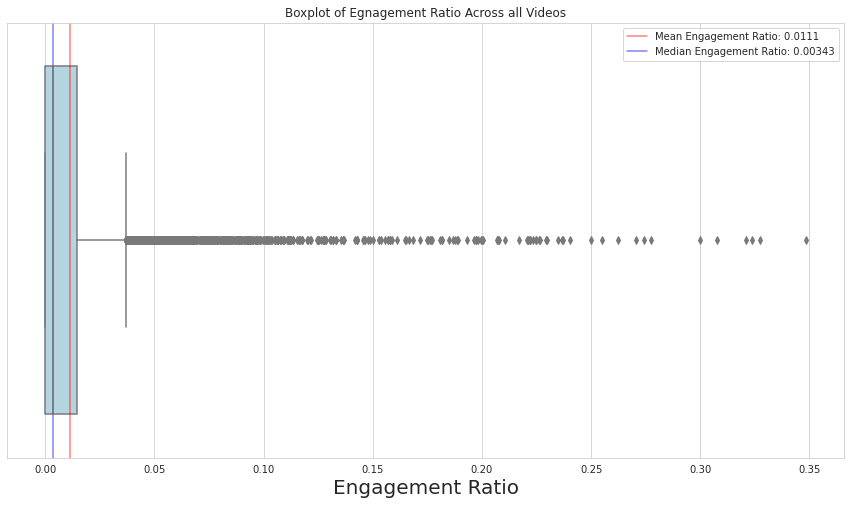

In [66]:
sns.boxplot(x=eng['Engagement Ratio'], color='#ADD8E6')

plt.axvline(x=df['Engagement Ratio'].mean(), color = 'red', alpha = 0.5, label = 'Mean Engagement Ratio: ' +  str(round_sig(df['Engagement Ratio'].mean(), 3)))
plt.axvline(x=df['Engagement Ratio'].median(), color = 'blue', alpha = 0.5, label = 'Median Engagement Ratio: ' +  str(round_sig(df['Engagement Ratio'].median(), 3)))



plt.xlabel('Engagement Ratio',fontsize=20)

plt.title('Boxplot of Egnagement Ratio Across all Videos')
plt.legend()

#### Views

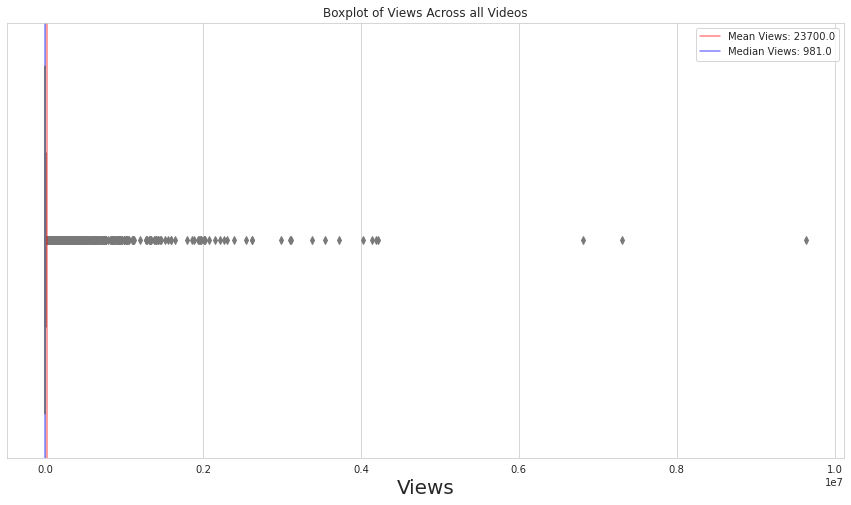

In [67]:
#Plot summary statistics of Views

sns.boxplot(x=df['Views'], color='#ADD8E6')

plt.axvline(x=df['Views'].mean(), color = 'red', alpha = 0.5, label = 'Mean Views: ' +  str(round_sig(df['Views'].mean(), 3)))
plt.axvline(x=df['Views'].median(), color = 'blue', alpha = 0.5, label = 'Median Views: ' +  str(round_sig(df['Views'].median(), 3)))


plt.xlabel('Views',fontsize=20)

plt.title('Boxplot of Views Across all Videos')
plt.legend()

This visualisation is impossible to read as we are dealing with a large range due to viral spread of certain videos. For this reason we plot only the bottom 90th percentile for a much better understanding.

#### Views of the Bottom 90% of Videos

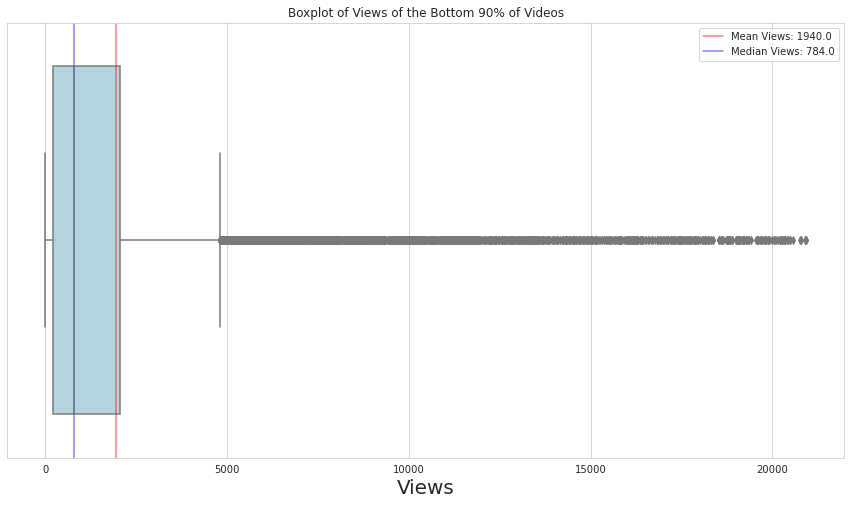

In [68]:
fig, ax = plt.subplots()

df_low_views = df[df['Views'] < np.percentile(df['Views'], 90)]
sns.boxplot(x=df_low_views['Views'], color='#ADD8E6')

plt.axvline(x=df_low_views['Views'].mean(), color = 'red', alpha = 0.5, label = 'Mean Views: ' +  str(round_sig(df_low_views['Views'].mean(), 3)))
plt.axvline(x=df_low_views['Views'].median(), color = 'blue', alpha = 0.5, label = 'Median Views: ' +  str(round_sig(df_low_views['Views'].median(), 3)))


plt.xlabel('Views',fontsize=20)


plt.title('Boxplot of Views of the Bottom 90% of Videos')
plt.legend()

### Supporting Analysis / Company Data
#### Videos created by each company

Text(0.5, 1.0, 'Videos Uploaded by the Top 30 Companies')

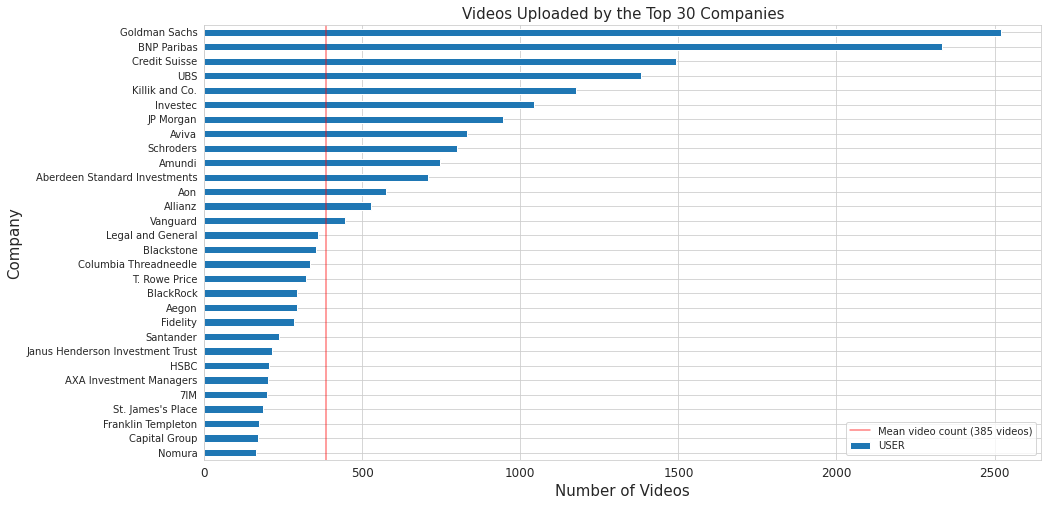

In [69]:
brand_counts = df2['USER'].value_counts().head(30)

plt.rcParams['figure.figsize']=15,8
fig, ax = plt.subplots()

brand_counts.sort_values(ascending=True).plot(kind='barh')

plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 0)

plt.axvline(x=df2.groupby('USER').size().mean(), color = 'red', alpha = 0.5, label = 'Mean video count (385 videos)')

plt.legend()

plt.ylabel('Company', fontsize = 15)
plt.xlabel('Number of Videos', fontsize = 15)
plt.title('Videos Uploaded by the Top 30 Companies', fontsize = 15)

### Social Media Followers
Below we create boxplots of the distribution of followers by each platform.

Text(0.5, 1.0, 'Distribution of Youtube Subscribers')

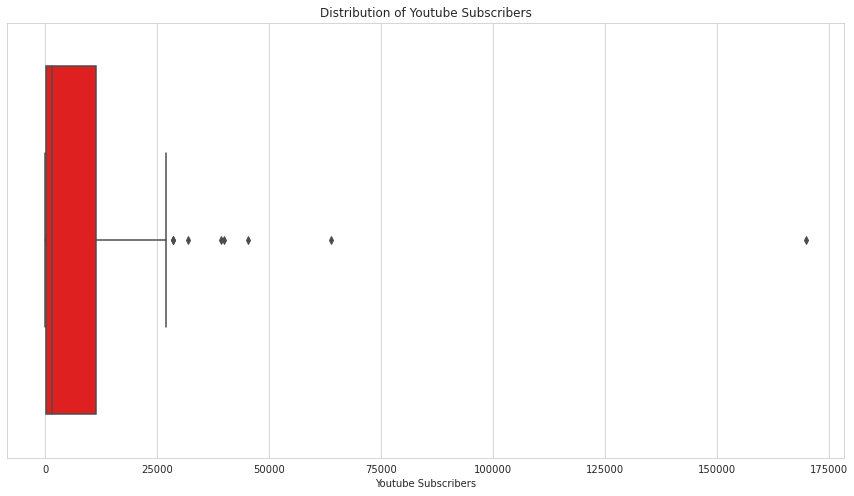

In [70]:
#Youtube
#Plotting boxplots for each platform
sns.boxplot(x=df3['Youtube Subscribers'], color='#FF0000')

plt.title('Distribution of Youtube Subscribers')

Text(0.5, 1.0, 'Distribution of Facebook Followers')

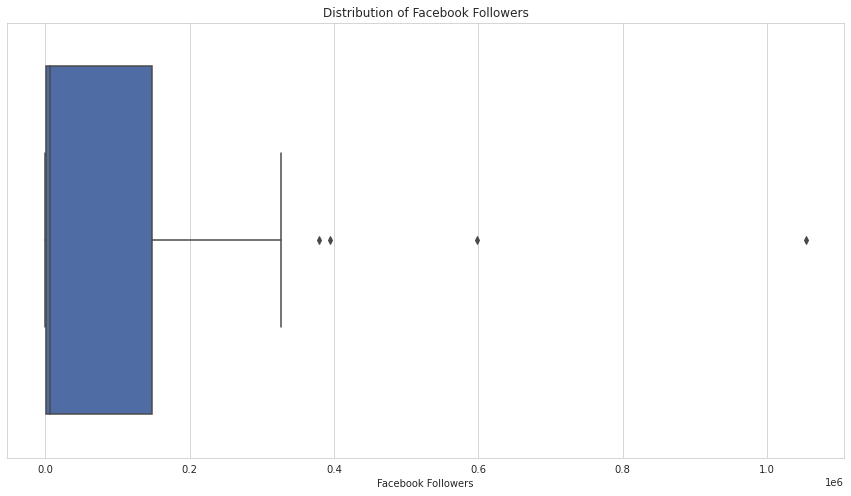

In [71]:
#Facebook
#Cutting out some outliers to make the visual easier to read
fb_followers = df3[df3['Facebook Followers']<1500000]

sns.boxplot(x=fb_followers['Facebook Followers'], color='#4267B2')

plt.title('Distribution of Facebook Followers')

Text(0.5, 1.0, 'Distribution of LinkedIn Followers')

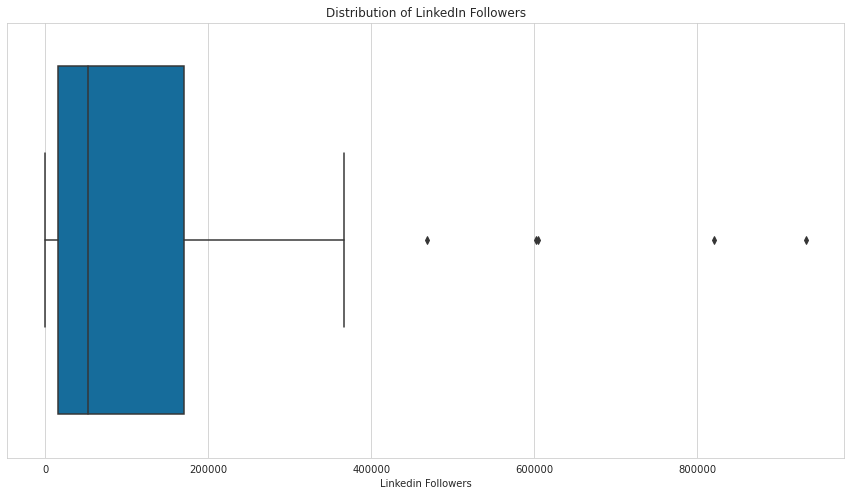

In [72]:
#LinkedIn
#Cutting out some outliers to make the visual easier to read
lk_followers = df3[df3['Linkedin Followers']<1000000]

sns.boxplot(x=lk_followers['Linkedin Followers'], color='#0072b1')

plt.title('Distribution of LinkedIn Followers')

Text(0.5, 1.0, 'Distribution of Twitter Followers')

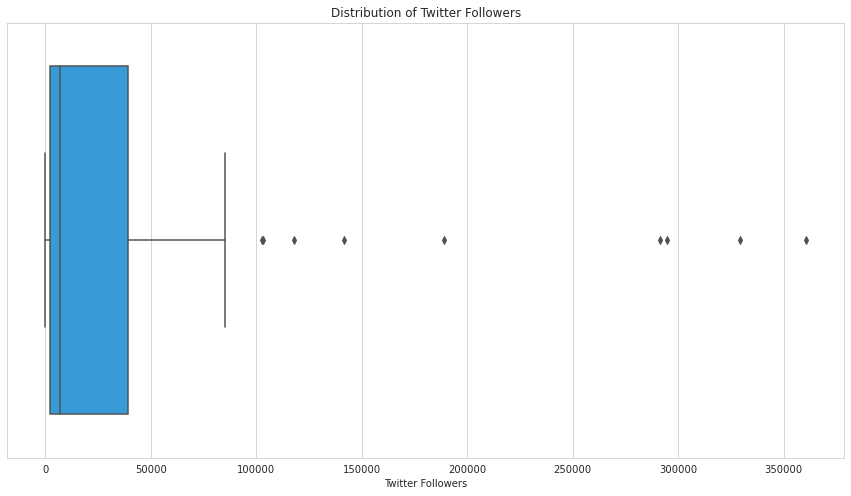

In [73]:
#Twitter
#Cutting out some outliers to make the visual easier to read
tw_followers = df3[df3['Twitter Followers']<400000]

sns.boxplot(x=tw_followers['Twitter Followers'], color='#1DA1F2')

plt.title('Distribution of Twitter Followers')

## Chapter 4. Modelling
This chapter is wholly concerned with the modelling phase of this project. We will preprocess the data into the correct format for our classification problem after which we will train four classifier models; Logistic Regression, Decision Tree Classifier, Random Forest Claissifier and XGBoost Classifier.

### Scale the Data
First we ust scale the data to avoid the overfitting of our models caused by the different scaling of our features. This is most essential for our "Views" and "Seconds" features, which have significantly larger ranges than any otehr feature

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns).round(10)

#df['Positive Easy Engagements'] = scaler.fit_transform(df['Positive Easy Engagements'].values.reshape(-1,1))
#df['Seconds'] = scaler.fit_transform(df['Seconds'].values.reshape(-1,1))

df

,Seconds,Views,Positive Easy Engagements,Negative Easy Engagements,Positive Strong Engagements,Engagement Ratio,FB,IN,LK,TW,...,English (US),French,German,Italian,No Language,Other Languages,Polish,Portugese,Spanish,Effective
0,0.005921,0.000012,0.000032,0.000000,0.000000,0.060060,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.013262,0.000536,0.000425,0.000461,0.000000,0.017734,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.007706,0.001172,0.000095,0.000000,0.000000,0.001770,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000852,0.000008,0.000016,0.000000,0.000000,0.044444,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.020765,0.001073,0.000205,0.000461,0.000000,0.004349,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21193,0.000933,0.000022,0.000032,0.000000,0.000000,0.031596,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21194,0.001744,0.000017,0.000016,0.000000,0.000000,0.020450,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21195,0.001338,0.000014,0.000016,0.000000,0.000000,0.024510,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21196,0.012613,0.000283,0.000150,0.000000,0.000225,0.012210,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Marking the target column and splitting the data
Now we mark the target (dependent) variable for our models and split the data. We split by using the 1/3 and 2/3 split, where our test data will be a third of the dataset and the training data will be two thirds. This threshold was used after a couple of manual checks of different splits, such as 75%/25%, 50%/50% and 60%/40%, but the one we ended up using lead to the best performing models.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [76]:
x=df.drop(['Effective','Views','Engagement Ratio'],axis=1)
y=df.Effective


print(x.shape)
print(y.shape)

(21198, 34)
(21198,)


In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

### Measure feature importance with Gini Score
Measuring the relative feature importance to eliminate some insignificant features. This reduces noise and improves the performance of our models.

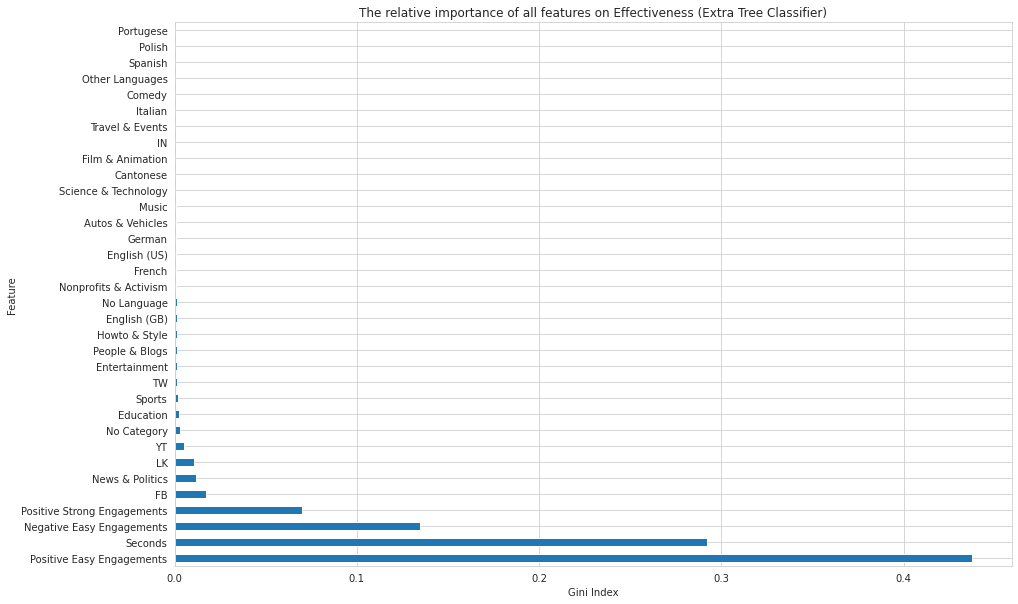

In [78]:
sn.set_style("whitegrid")

plt.rcParams['figure.figsize']=15,10 

from sklearn.ensemble import ExtraTreesClassifier

#model = ExtraTreesClassifier(criterion = 'entropy')
model = ExtraTreesClassifier(criterion = 'gini')

model.fit(x_train,y_train)
#print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(40).plot(kind='barh')
plt.title('The relative importance of all features on Effectiveness (Extra Tree Classifier)')
plt.xlabel('Gini Index')
plt.ylabel('Feature')

#plt.axvline(x=0.02, color = 'red')

plt.show()

In [79]:
#Showing the 20 least important features
feat_importances.nsmallest(20)

Portugese                0.000031
Polish                   0.000070
Spanish                  0.000071
Other Languages          0.000094
Comedy                   0.000109
Italian                  0.000157
Travel & Events          0.000213
IN                       0.000435
Film & Animation         0.000453
Cantonese                0.000475
Science & Technology     0.000489
Music                    0.000565
Autos & Vehicles         0.000570
German                   0.000598
English (US)             0.000638
French                   0.000651
Nonprofits & Activism    0.000731
No Language              0.001134
English (GB)             0.001156
Howto & Style            0.001176
dtype: float64

In [80]:
#Select 10 least important features
least_important_columns = pd.DataFrame(feat_importances.nsmallest(10)).index.values.tolist()

In [81]:
#drop 10 least important features as they all have a Gini Index of less than 0.0005
df.drop(columns = least_important_columns, axis=1, inplace=True)

In [82]:
x.drop(columns = least_important_columns, axis=1, inplace=True)

In [83]:
#See what the data looks like now
x

,Seconds,Positive Easy Engagements,Negative Easy Engagements,Positive Strong Engagements,FB,LK,TW,YT,Autos & Vehicles,Education,...,No Category,Nonprofits & Activism,People & Blogs,Science & Technology,Sports,English (GB),English (US),French,German,No Language
0,0.005921,0.000032,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.013262,0.000425,0.000461,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.007706,0.000095,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000852,0.000016,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.020765,0.000205,0.000461,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21193,0.000933,0.000032,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21194,0.001744,0.000016,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21195,0.001338,0.000016,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21196,0.012613,0.000150,0.000000,0.000225,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Correlation Matrix and Multicollinearity

<AxesSubplot:>

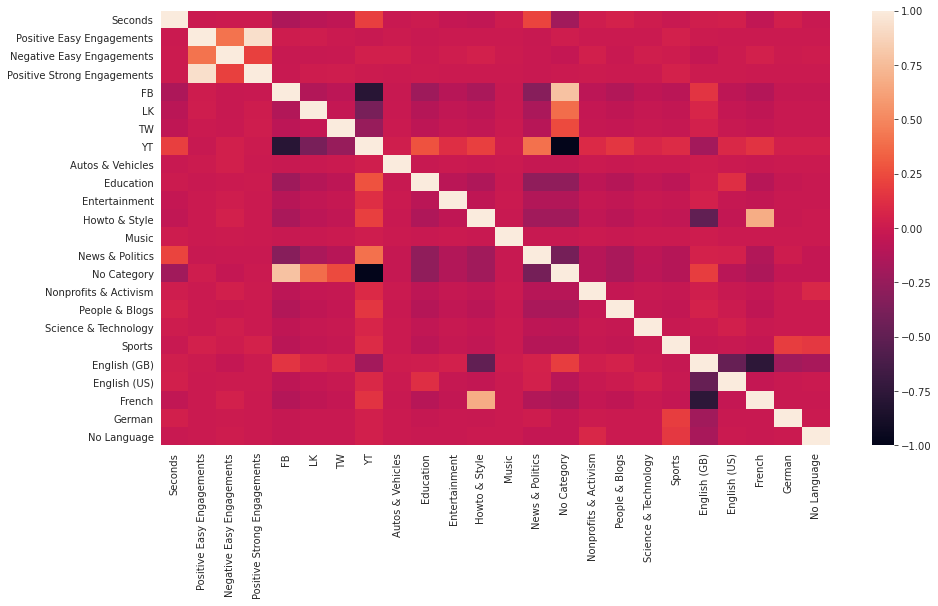

In [84]:
plt.rcParams['figure.figsize']=15,8 
corr = x.select_dtypes([np.number]).corr()
sns.heatmap(corr)

In [85]:
#Drop Positive Easy Engagement as it is highly correlated with all other engagements and statistically 
#most significant in determining Effectiveness
x=x.drop(['Positive Easy Engagements'],axis=1)
x

,Seconds,Negative Easy Engagements,Positive Strong Engagements,FB,LK,TW,YT,Autos & Vehicles,Education,Entertainment,...,No Category,Nonprofits & Activism,People & Blogs,Science & Technology,Sports,English (GB),English (US),French,German,No Language
0,0.005921,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.013262,0.000461,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.007706,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000852,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.020765,0.000461,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21193,0.000933,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21194,0.001744,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21195,0.001338,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21196,0.012613,0.000000,0.000225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### SMOTE

In [86]:
#!pip install imblearn

In [87]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=40,sampling_strategy=1)

x_sm, y_sm = sm.fit_resample(x,y)

print(f''' X's Shape before SMOTE :{x.shape}
X's Shape After SMOTE : {x_sm.shape}''')

print(f''' Y's Shape before SMOTE :{y.shape}
Y's Shape After SMOTE : {y_sm.shape}''')


 X's Shape before SMOTE :(21198, 23)
X's Shape After SMOTE : (36484, 23)
 Y's Shape before SMOTE :(21198,)
Y's Shape After SMOTE : (36484,)


### Split the new SMOTE data
Here we create a new x and y, which the SMOTE algorithm will oversample for us. This will balance the minority and majority class imbalance toa. 50/50 split.

In [88]:
x = x_sm
y = y_sm

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [89]:
#Check the class imbalance now
print('The percentage split of each target class:')
y.value_counts(normalize=True)*100

The percentage split of each target class:


0.0    50.0
1.0    50.0
Name: Effective, dtype: float64

Now the distribution is even at 50% being effective and 50% ineffective

### Grid Search

#### By completing a Grid Search we acquire the otpimal hyperparameters for our models, which we can then use to train our final models

In [90]:
#!pip install xgboost

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [92]:
model_params = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,10,50,100,500],
            'criterion' :['gini', 'entropy'],
            'min_samples_leaf' : [2,3,4]
        }
    },
    'Decision Tree': {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' :['gini', 'entropy'],
            'max_depth' : [None, 2,3,4],
            'min_samples_leaf' : [2,3,4]
        }
    },
    'Logistic Regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [100,10,1,0.1,0.01],
            'solver':['newton_cg','liblinear','lbfgs','sag','saga'],
            'penalty':['l1','l2','none']
        }
    },
    'XGBoost': {
        'model' : XGBClassifier(),
        'params' : {
            'n_estimators':[5,10,50,100],
            'max_depth' : [2,3,4],
            'colsample_bytree' : [0.2,0.4,0.6],
            'gamma' : [0.5,1,2,4],
            'min_child_weight' : [2,3,4]
            
        }
    },
    
}


In [93]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
results = pd.DataFrame(scores,columns=['model','best_score','best_params'])
results

[10:01:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:01:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:01:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:01:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:01:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:01:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:01:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:01:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:01:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:01:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:01:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:01:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:02:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:02:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:02:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:02:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:02:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:02:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:03:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:03:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:03:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:03:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:03:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:04:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:04:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:04:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:04:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:04:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:04:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:05:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:05:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:05:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:05:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:05:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:05:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:06:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:06:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:06:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:06:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:06:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:07:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:07:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:07:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:07:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:07:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:08:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:08:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:08:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:08:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:08:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:08:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:09:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:09:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:09:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:09:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:10:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:10:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:10:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:10:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:10:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:11:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:11:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:11:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:11:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:11:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:12:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:12:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:12:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:12:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:13:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:13:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:13:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:14:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:14:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:14:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:14:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:14:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:15:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:15:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:15:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:15:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:15:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:16:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:16:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[10:16:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:16:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,model,best_score,best_params
0,Random Forest,0.778562,"{'criterion': 'gini', 'min_samples_leaf': 2, '..."
1,Decision Tree,0.788950,"{'criterion': 'entropy', 'max_depth': None, 'm..."
2,Logistic Regression,0.700583,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}"
3,XGBoost,0.785742,"{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_d..."


In [94]:
results = results.reindex([2,1,0,3])
results = results.rename(index={2:0,0:2})
results

,model,best_score,best_params
0,Logistic Regression,0.700583,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}"
1,Decision Tree,0.788950,"{'criterion': 'entropy', 'max_depth': None, 'm..."
2,Random Forest,0.778562,"{'criterion': 'gini', 'min_samples_leaf': 2, '..."
3,XGBoost,0.785742,"{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_d..."


### KFold Cross Validation

In [95]:
from sklearn.model_selection import cross_val_score

#### Cross Validation Score for LogReg

In [96]:
#Optimal Hyperparameters for LogReg
results.loc[0,'best_params']

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [97]:
log_scores = cross_val_score(LogisticRegression(C = 10, solver='liblinear', penalty = 'l1'), x, y,cv=10)
np.average(log_scores)

0.7105699921391585

#### Cross Validation Score for Decision Tree Classifier

In [98]:
### Decision Tree Classifier
results.loc[1,'best_params']

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2}

In [99]:
tree_scores = cross_val_score(DecisionTreeClassifier(criterion = 'entropy',max_depth=None, min_samples_leaf=2),x, y,cv=10)
np.average(tree_scores)

0.8171080652353686

#### Cross Validation Score for Random Forest Classifier

In [100]:
#Optimal Hyperparameters for RF
results.loc[2,'best_params']

{'criterion': 'gini', 'min_samples_leaf': 2, 'n_estimators': 100}

In [101]:
rf_scores = cross_val_score(RandomForestClassifier(criterion = 'gini',n_estimators=100,min_samples_leaf=2), x, y,cv=10)
np.average(rf_scores)

0.8148859201391392

#### Cross Validation Score for XGBoost

In [102]:
#Optimal Hyperparameters
results.loc[3,'best_params']

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 5}

In [103]:
xgb_scores = cross_val_score(XGBClassifier(colsample_bytree = 0.6, gamma = 0.5, min_child_weight=2, n_estimators = 5, max_depth=3), x, y,cv=10)
np.average(xgb_scores)

[10:21:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:21:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:21:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:21:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

0.7954301196434495

### Training Individual Models

In [104]:
#Models with the optimal parameters in them
#LogisticRegression(C = 10, solver='liblinear', penalty = 'l1')
#DecisionTreeClassifier(criterion = 'entropy',max_depth=None, min_samples_leaf=2)
#RandomForestClassifier(criterion = 'gini',n_estimators=100,min_samples_leaf=2)
#XGBClassifier(colsample_bytree = 0.6, gamma = 0.5, min_child_weight=2, n_estimators = 5, max_depth=3)

#### Logistic Regression

In [105]:
np.random.seed(10)

In [106]:
model = LogisticRegression(C = 10, solver='liblinear', penalty = 'l1')

#Fitting the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

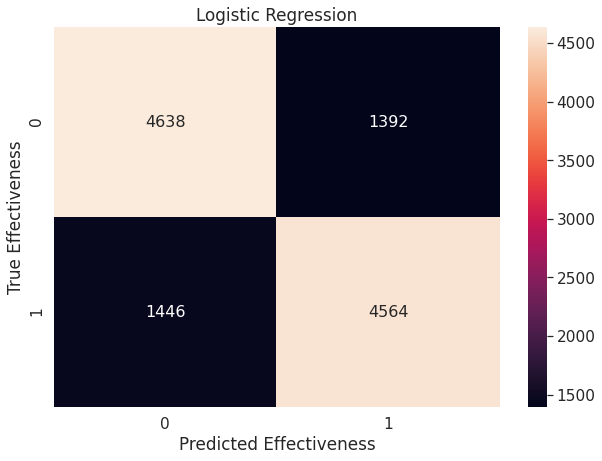

The Logistic Regression model accuracy is:  76.43 %


In [107]:
plt.rcParams['figure.figsize']=10,7
log_list = []

acc_logreg = accuracy_score(y_test, y_pred)
log_list.append(acc_logreg)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g')
plt.ylabel('True Effectiveness')
plt.xlabel('Predicted Effectiveness')
plt.title('Logistic Regression')
plt.show()
print('The Logistic Regression model accuracy is: ', f'{acc_logreg*100:.4}','%')

In [108]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

tn = cm.loc[0,0]
tp = cm.loc[1,1]
fn = cm.loc[1,0]
fp = cm.loc[0,1]

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision: ", f'{precision*100:.4}','%')
print("Recall: ", f'{recall*100:.4}','%')
print("F1-Score: ", f'{f1*100:.4}','%')

Precision:  76.63 %
Recall:  75.94 %
F1-Score:  76.28 %


#### Decision Tree Classifier

In [109]:
#Here we choose the lowest number of leaf nodes with the highest accuracy in order to try to avoid overfitting, by giving the model less freedom
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=None, min_samples_leaf=2)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

[1. 1. 0. ... 1. 0. 0.]


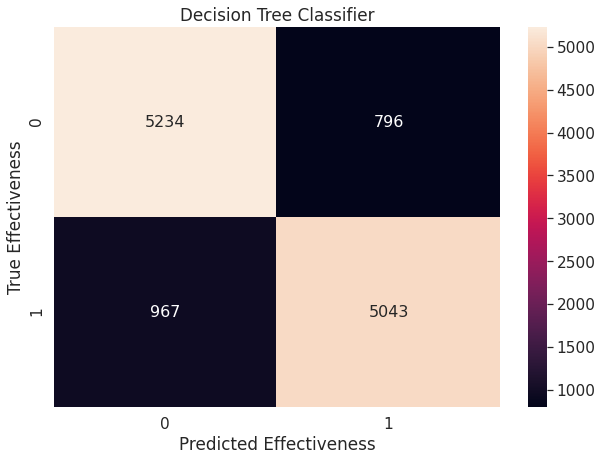

The Decision Tree Classifier model accuracy is:  85.36 %


In [110]:
#Visualising the results

list3 = []

acc_tree = accuracy_score(y_test, y_pred)
list3.append(acc_tree)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g')

plt.ylabel('True Effectiveness')
plt.xlabel('Predicted Effectiveness')
plt.title('Decision Tree Classifier')

plt.show()

print('The Decision Tree Classifier model accuracy is: ', f'{acc_tree*100:.4}','%')

In [111]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

tn = cm.loc[0,0]
tp = cm.loc[1,1]
fn = cm.loc[1,0]
fp = cm.loc[0,1]

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision: ", f'{precision*100:.4}','%')
print("Recall: ", f'{recall*100:.4}','%')
print("F1-Score: ", f'{f1*100:.4}','%')

Precision:  86.37 %
Recall:  83.91 %
F1-Score:  85.12 %


#### Random Forest Classifier

In [112]:
classifier = RandomForestClassifier(criterion = 'gini',n_estimators=100,min_samples_leaf=2)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)
print(y_pred)


[1. 1. 0. ... 1. 0. 1.]


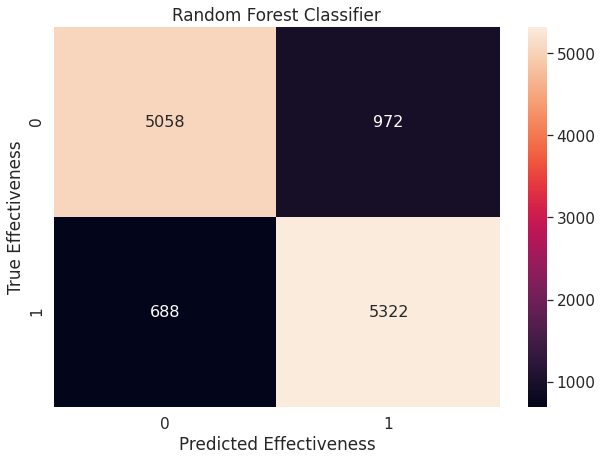

The Random Forest Classifier accuracy is:  86.21 %


In [113]:
#Visualising the results

list5 = []

acc_random = accuracy_score(y_test, y_pred)
list5.append(acc_random)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt = 'g')

plt.ylabel('True Effectiveness')
plt.xlabel('Predicted Effectiveness')
plt.title('Random Forest Classifier')
plt.show()

print('The Random Forest Classifier accuracy is: ', f'{acc_random*100:.4}','%')

In [114]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

tn = cm.loc[0,0]
tp = cm.loc[1,1]
fn = cm.loc[1,0]
fp = cm.loc[0,1]

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision: ", f'{precision*100:.4}','%')
print("Recall: ", f'{recall*100:.4}','%')
print("F1-Score: ", f'{f1*100:.4}','%')

Precision:  84.56 %
Recall:  88.55 %
F1-Score:  86.51 %


#### XGBoost 

In [115]:
#Training the model
classifier = XGBClassifier(colsample_bytree = 0.6, gamma = 0.5, min_child_weight=2, n_estimators = 5, max_depth=3)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

print(y_pred)

[10:22:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1. 1. 0. ... 1. 1. 1.]


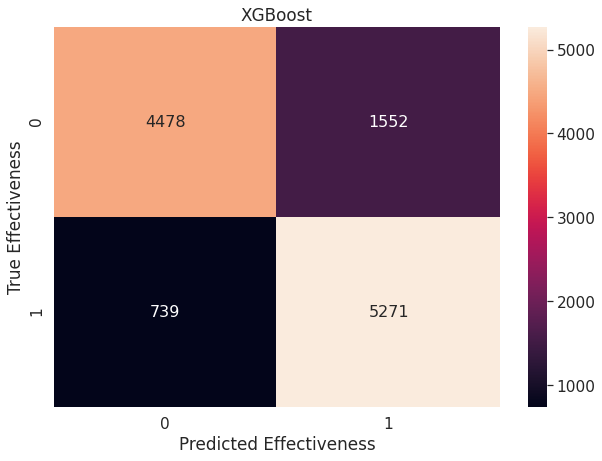

The XGBoost model accuracy is:  80.97 %


In [116]:
#Visualising the results
list8 = []

acc_xgb = accuracy_score(y_test, y_pred)
list8.append(acc_xgb)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt= 'g')

plt.ylabel('True Effectiveness')
plt.xlabel('Predicted Effectiveness')
plt.title('XGBoost')

plt.show()

print('The XGBoost model accuracy is: ', f'{acc_xgb*100:.4}','%')

In [117]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

tn = cm.loc[0,0]
tp = cm.loc[1,1]
fn = cm.loc[1,0]
fp = cm.loc[0,1]

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision: ", f'{precision*100:.4}','%')
print("Recall: ", f'{recall*100:.4}','%')
print("F1-Score: ", f'{f1*100:.4}','%')

Precision:  77.25 %
Recall:  87.7 %
F1-Score:  82.15 %


## Chapter 5. Findings

### Final Model Comparison

In [118]:
#Creating a dataframe with the accuracies of the models
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest',   
              'Decision Tree','XGBoost'],
    'Accuracy': [acc_logreg, acc_random, 
                 acc_tree,acc_xgb]
              
                
                
            
                })

#Sorting the Models by their Accuracies
models = models.sort_values(by='Accuracy', ascending=False)
models

,Model,Accuracy
1,Random Forest,0.862126
2,Decision Tree,0.853571
3,XGBoost,0.809718
0,Logistic Regression,0.764286


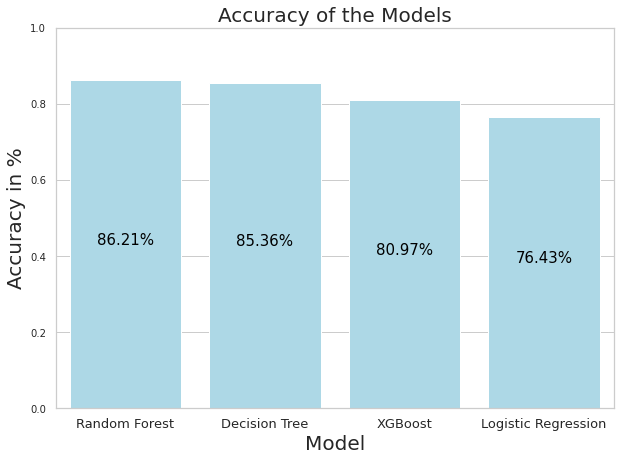

In [119]:
sns.set_style("whitegrid")
ax = sns.barplot(x=models.Model, y=models.Accuracy, color = '#ADD8E6', saturation =1.5)

plt.xlabel("Model", fontsize = 20 )
plt.ylabel("Accuracy in %", fontsize = 20)
plt.title("Accuracy of the Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 10)
plt.ylim([0, 1])


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*0.5), ha='center', fontsize = '15', color = 'black')
plt.show()

### ROC and AUC Curves

In [120]:
from sklearn.metrics import roc_curve, roc_auc_score

In [121]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(C = 10, solver='liblinear', penalty = 'l1'),
               DecisionTreeClassifier(criterion = 'entropy',max_depth=None, min_samples_leaf=2),
               RandomForestClassifier(criterion = 'gini',n_estimators=100,min_samples_leaf=2),
               XGBClassifier(colsample_bytree = 0.6, gamma = 0.5, min_child_weight=2, n_estimators = 5, max_depth=3)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['Classifiers', 'FPR','TPR','AUC'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_train, y_train)
    yproba = model.predict_proba(x_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'Classifiers':cls.__class__.__name__,
                                        'FPR':fpr, 
                                        'TPR':tpr, 
                                        'AUC':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('Classifiers', inplace=True)

[10:22:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


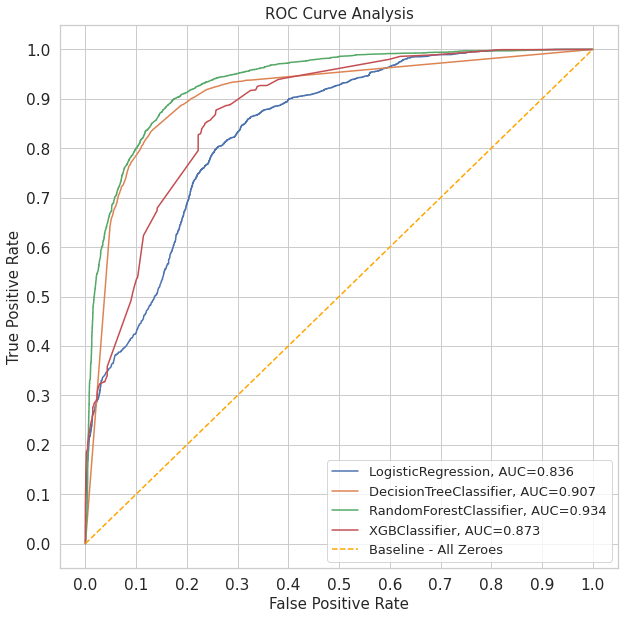

In [122]:
fig = plt.figure(figsize=(10,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['FPR'], 
             result_table.loc[i]['TPR'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['AUC']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--', label='Baseline - All Zeroes')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### Precision Recall Curve

In [123]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Precision-Recall Analysis')

<Figure size 720x576 with 0 Axes>

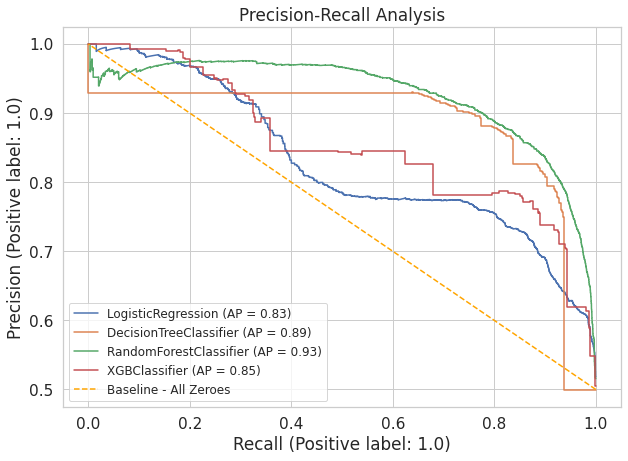

In [124]:
plt.figure(figsize=(10,8))
fig, ax = plt.subplots()
for cls in classifiers:
    disp = plot_precision_recall_curve(cls, x_test, y_test, ax = ax)

plt.plot([1,0], [0.5,1], color='orange', linestyle='--', label='Baseline - All Zeroes')
plt.legend(fontsize=12)
plt.title('Precision-Recall Analysis')

### Odds Ratio for Logistic Regression

In [125]:
model = LogisticRegression(C = 10, solver='liblinear', penalty = 'l1')

res = model.fit(x_train, y_train)

In [126]:
odds=pd.DataFrame({'variable':x_train.columns.tolist(), 'odds_ratio':(np.exp(res.coef_).T).tolist()})
odds['odds_ratio'] = odds['odds_ratio'].str.get(0)

odds=odds.sort_values('odds_ratio', ascending=False)

odds=odds.set_index(odds['variable'])
odds.drop('variable', axis=1,inplace=True)
odds

,odds_ratio
variable,
Negative Easy Engagements,inf
Positive Strong Engagements,inf
FB,4.968405e+00
Music,4.607155e+00
Sports,2.527812e+00
German,2.277563e+00
Entertainment,1.993114e+00
Autos & Vehicles,1.980120e+00
Education,1.600375e+00


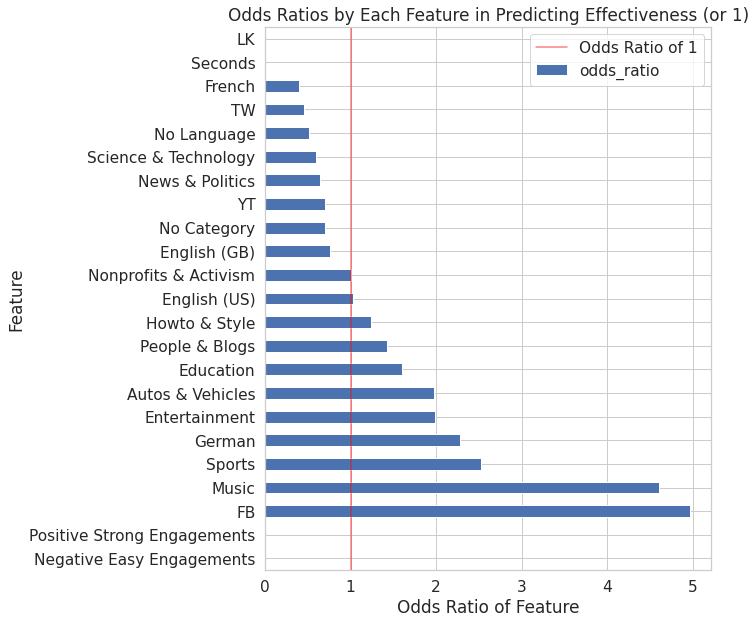

In [127]:
#Plot
plt.rcParams['figure.figsize']=8,10

odds.plot(kind='barh')
plt.title('Odds Ratios by Each Feature in Predicting Effectiveness (or 1)')
plt.xlabel('Odds Ratio of Feature')
plt.ylabel('Feature')

plt.axvline(x=1, color = 'red', alpha=.5, label='Odds Ratio of 1')
plt.legend()
plt.show()

### SHAP Analysis

In [128]:
#!pip install shap
import shap

In [129]:
#Obtain our best performing model once more, which was Random Forest Classifier
rf = RandomForestClassifier(criterion = 'entropy',n_estimators=50,min_samples_leaf=2)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_estimators=50)

In [130]:
#Get the SHAP values
explainer = shap.TreeExplainer(rf)


In [131]:
#Choose a random instance from our data
x_test.iloc[400]

Seconds                        0.008492
Negative Easy Engagements      0.005459
Positive Strong Engagements    0.000000
FB                             0.000000
LK                             0.000000
TW                             0.000000
YT                             1.000000
Autos & Vehicles               0.000000
Education                      0.000000
Entertainment                  0.000000
Howto & Style                  1.000000
Music                          0.000000
News & Politics                0.000000
No Category                    0.000000
Nonprofits & Activism          0.000000
People & Blogs                 0.000000
Science & Technology           0.000000
Sports                         0.000000
English (GB)                   1.000000
English (US)                   0.000000
French                         0.000000
German                         0.000000
No Language                    0.000000
Name: 33586, dtype: float64

In [132]:
chosen_instance = x_test.iloc[[400]]
shap_values = explainer.shap_values(chosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], chosen_instance)

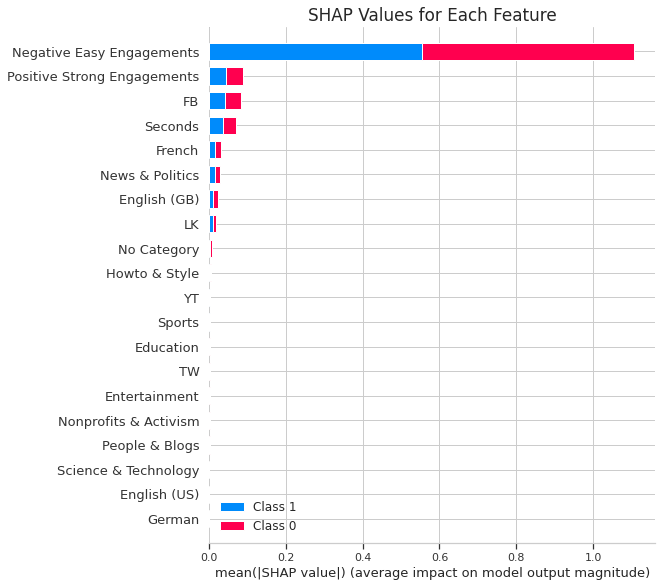

In [133]:
plt.rcParams['figure.figsize']=5,1

plt.title('SHAP Values for Each Feature')

shap.summary_plot(shap_values, x_train)

### Check why FB is considered so impactful

In [134]:
fb = df[df['FB']==1.0]

In [135]:
fb['Effective'].value_counts()

0.0    3130
1.0    1096
Name: Effective, dtype: int64

In [136]:
print('Percentage of effective videos on FB: ' + str(round(1096/(3130+1096)*100, 2)) + '%')

Percentage of effective videos on FB: 25.93%


#### Check other platforms and their distribution of effectiveness

In [137]:
#Youtube
yt = df[df['YT']==1.0]
yt['Effective'].value_counts()

0.0    13309
1.0     1798
Name: Effective, dtype: int64

In [138]:
print('Percentage of effective videos on YT: ' + str(round(1798/(13309+1798)*100, 2)) + '%')

Percentage of effective videos on YT: 11.9%


In [139]:
#Linkedin
lk = df[df['LK']==1.0]
lk['Effective'].value_counts()

0.0    1221
Name: Effective, dtype: int64

In [140]:
print('Percentage of effective videos on LK: ' + str(round(0/(1221)*100, 2)) + '%')

Percentage of effective videos on LK: 0.0%


In [141]:
#Twitter
tw = df[df['TW']==1.0]
tw['Effective'].value_counts()

0.0    461
1.0     45
Name: Effective, dtype: int64

In [142]:
print('Percentage of effective videos on TW: ' + str(round(45/(45+461)*100, 2)) + '%')

Percentage of effective videos on TW: 8.89%


In [143]:
#Instagram
#Since it was dropped from our main dataframe
#when features were eliminated based on their importance
#we draw it back in

df2['Effective'] =  df['Effective']

df2.groupby('Platform')['Effective'].value_counts()

#ins = d[df['IN']==1.0]
#ins['Effective'].value_counts()

Platform  Effective
FB        0.0           3130
          1.0           1096
IN        0.0            121
          1.0             17
LK        0.0           1221
TW        0.0            461
          1.0             45
YT        0.0          13309
          1.0           1798
Name: Effective, dtype: int64

In [144]:
print('Percentage of effective videos on IN: ' + str(round(17/(17+121)*100, 2)) + '%')

Percentage of effective videos on IN: 12.32%


In [145]:
#average of videos not on facebook
np.average([11.9,0,8.89,12.32])

8.2775

We can observe that Facebook has a significantly higher percentage of effective videos uploaded (about 25.93%) compared to all the other platforms (average about 8.2%). This is probably caused by the fact that Facebook as a platform sustains both high viewerships and engagement ratios. This can be caused by the appearing 'ease' of engaging with content, while 'liking a video on Youtube can seem like a greater effort.

#### Checking how great of a proportion Youtube and Facebook Videos make of the whole dataset

In [146]:
video_counts = df2['Platform'].value_counts()
video_counts

YT    15107
FB     4226
LK     1221
TW      506
IN      138
Name: Platform, dtype: int64

In [147]:
proportion = (video_counts['YT'] + video_counts['FB']) / (video_counts['LK'] + video_counts['TW'] + video_counts['IN'] + video_counts['YT'] + video_counts['FB'])
print('The proportion of YT + FB videos in the data: '+str(round(proportion*100))+'%')

The proportion of YT + FB videos in the data: 91.0%


### Categories
#### News & Politics

In [148]:
#Proportion of Effective Videos in this category
news = df[df['News & Politics']==1.0]
news['Effective'].value_counts()

0.0    5675
1.0     339
Name: Effective, dtype: int64

In [149]:
df2['Effective'] = df['Effective']

In [150]:
categories = pd.DataFrame(df2.groupby('Category')['Effective'].value_counts().unstack())
categories['Effectiveness Percent'] = categories[1.0] / (categories[0.0] + categories[1.0])
categories.sort_values(by='Effectiveness Percent')

Effective,0.0,1.0,Effectiveness Percent
Category,,,
News & Politics,5675,339,0.056368
Travel & Events,44,3,0.063830
People & Blogs,1107,127,0.102917
Film & Animation,350,41,0.104859
Science & Technology,220,40,0.153846
Education,2860,534,0.157336
Howto & Style,1589,321,0.168063
No Category,4933,1158,0.190117
Nonprofits & Activism,402,95,0.191147


Text(0.5, 0, 'No. of Effective Videos')

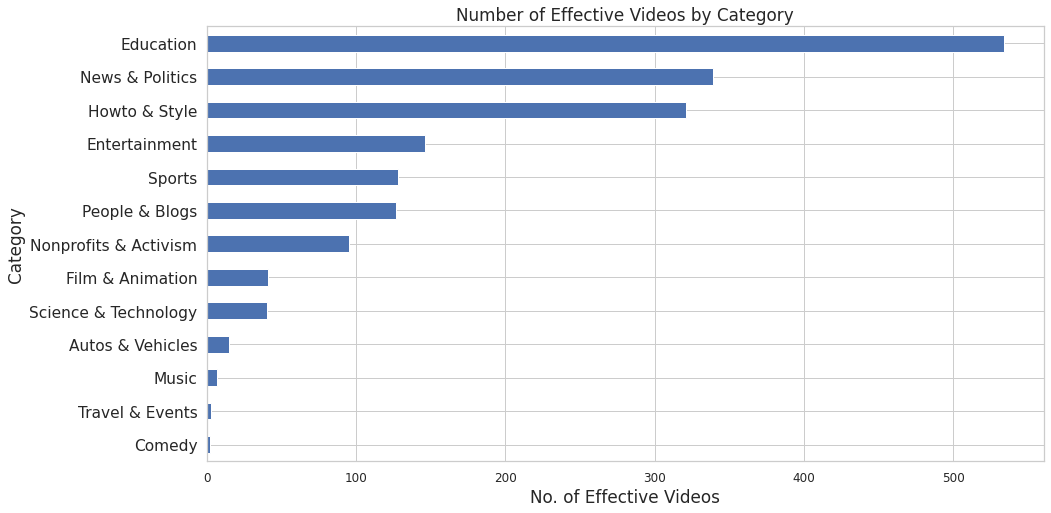

In [151]:
plt.rcParams['figure.figsize']=15,8

categories = df2[df2['Category']!='No Category']
categories = categories[categories['Effective']==1]

views_by_user = categories.groupby('Category')['Effective'].count().sort_values()

views_by_user.plot(kind='barh')

plt.xticks(fontsize = 12, horizontalalignment = 'center')

plt.title('Number of Effective Videos by Category')
plt.xlabel('No. of Effective Videos')

### Seconds
#### Checking for Descriptive Statistics on the Length (Seconds) of Videos

In [152]:
print('median\t\t'+str(effective['Seconds'].median()))
print(effective['Seconds'].describe())

median		124.0
count    1965.000000
mean      220.951145
std       480.010838
min         1.000000
25%        62.000000
50%       124.000000
75%       200.000000
max      8198.000000
Name: Seconds, dtype: float64


## Supportive Analysis

In [153]:
df3

,Estimated Annual Revenue (millions (USD)),Google Searches,Increasing Google Searches,Facebook Followers,Linkedin Followers,Youtube Subscribers,Twitter Followers,SOS,Total Number of Videos,Effectiveness Percent
7IM,80.1,8063.0,0.0,583.0,6500.0,156.0,884.0,0.01,38.0,0.105263
Aberdeen Standard Investments,4967.0,7458.0,1.0,27471.0,109312.0,3050.0,79843.0,0.01,199.0,0.060302
Aegon,79695.0,12951.0,1.0,144746.0,74300.0,1260.0,14300.0,0.02,335.0,0.211940
Allianz,165426.0,14246.0,0.0,3774810.0,602000.0,22417.0,5397.0,0.02,69.0,0.057971
Amundi,2595.0,8869.0,1.0,6141.0,92200.0,2980.0,6452.0,0.02,598.0,0.158863
Aon,10000.0,5358.0,1.0,40301.0,821000.0,6480.0,38900.0,0.01,37.0,0.351351
Aviva,64095.0,16865.0,1.0,1054462.0,200000.0,12060.0,42308.0,0.03,537.0,0.208566
AXA Investment Managers,1294.0,5045.0,1.0,3226701.0,87100.0,1660.0,85000.0,0.01,90.0,0.333333
Baillie Gifford,473.0,6517.0,1.0,851.0,30100.0,2042.0,8221.0,0.01,39.0,0.384615
Barclays,29770.0,19696.0,0.0,597932.0,1052482.0,17500.0,291200.0,0.03,19.0,0.210526


In [154]:
df3 = df3.fillna(df3.median())

In [155]:
df3.describe().to_csv(r'Summary Stats of Df3.csv')
df3.describe()

,Estimated Annual Revenue (millions (USD)),Google Searches,Increasing Google Searches,Facebook Followers,Linkedin Followers,Youtube Subscribers,Twitter Followers,SOS,Total Number of Videos,Effectiveness Percent
count,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000
mean,15464.765455,10568.363636,0.490909,2.692647e+05,3.154689e+05,11308.945455,88881.963636,0.018182,250.445455,0.209707
std,30355.954134,4380.391642,0.504525,7.629459e+05,6.469801e+05,25945.648036,174847.367419,0.008186,313.848582,0.173987
min,17.300000,2480.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,479.500000,7454.000000,0.000000,7.575000e+02,1.671300e+04,144.000000,2286.500000,0.010000,39.000000,0.092744
50%,4285.000000,9593.000000,0.000000,1.326200e+04,5.757700e+04,1440.000000,8131.000000,0.020000,133.500000,0.160909
75%,11537.500000,14149.500000,1.000000,1.704110e+05,2.497895e+05,11380.000000,82421.500000,0.020000,327.000000,0.282194
max,165426.000000,19696.000000,1.000000,3.774810e+06,2.874333e+06,170000.000000,858100.000000,0.030000,1305.000000,0.692771


#### Correlation test with out dependent variable

<AxesSubplot:>

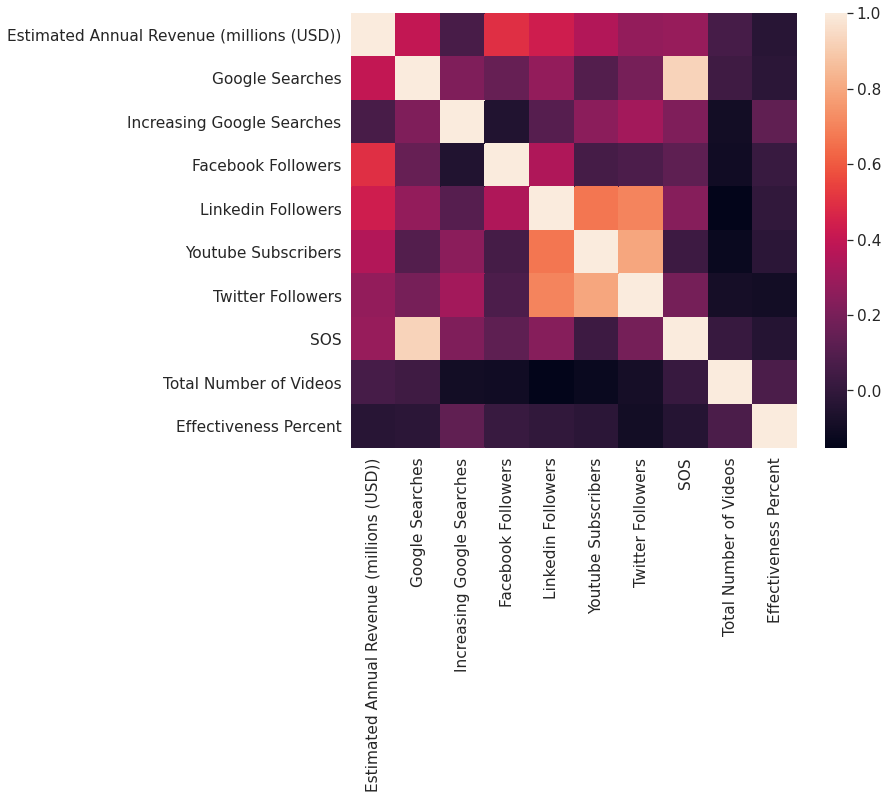

In [156]:
plt.rcParams['figure.figsize']=10,8
corr = df3.corr()
sns.heatmap(corr)

In [157]:
corr['Effectiveness Percent'].sort_values(ascending=False)

Effectiveness Percent                        1.000000
Increasing Google Searches                   0.132815
Total Number of Videos                       0.076942
Facebook Followers                           0.018999
Linkedin Followers                          -0.002881
Google Searches                             -0.018444
Youtube Subscribers                         -0.019239
Estimated Annual Revenue (millions (USD))   -0.030261
SOS                                         -0.038445
Twitter Followers                           -0.097301
Name: Effectiveness Percent, dtype: float64

In [158]:
#Drop Google Searches for being 

In [159]:
df3 = df3.drop('Google Searches', axis = 1)

In [160]:
df3

,Estimated Annual Revenue (millions (USD)),Increasing Google Searches,Facebook Followers,Linkedin Followers,Youtube Subscribers,Twitter Followers,SOS,Total Number of Videos,Effectiveness Percent
7IM,80.1,0.0,583.0,6500.0,156.0,884.0,0.01,38.0,0.105263
Aberdeen Standard Investments,4967.0,1.0,27471.0,109312.0,3050.0,79843.0,0.01,199.0,0.060302
Aegon,79695.0,1.0,144746.0,74300.0,1260.0,14300.0,0.02,335.0,0.211940
Allianz,165426.0,0.0,3774810.0,602000.0,22417.0,5397.0,0.02,69.0,0.057971
Amundi,2595.0,1.0,6141.0,92200.0,2980.0,6452.0,0.02,598.0,0.158863
Aon,10000.0,1.0,40301.0,821000.0,6480.0,38900.0,0.01,37.0,0.351351
Aviva,64095.0,1.0,1054462.0,200000.0,12060.0,42308.0,0.03,537.0,0.208566
AXA Investment Managers,1294.0,1.0,3226701.0,87100.0,1660.0,85000.0,0.01,90.0,0.333333
Baillie Gifford,473.0,1.0,851.0,30100.0,2042.0,8221.0,0.01,39.0,0.384615
Barclays,29770.0,0.0,597932.0,1052482.0,17500.0,291200.0,0.03,19.0,0.210526


### Linear Regression

#### Hold out one example company to test the final regression

This test happened to land on the company 'James Hambro & Partners'

In [161]:
scaler = MinMaxScaler()

df3 = pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns).round(10)


In [162]:
x = df3.drop('Effectiveness Percent', axis=1)
y = df3['Effectiveness Percent']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.01)

In [163]:
#Build a linear model
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train)

lr_1 = sm.OLS(y_train, x_train_lm).fit()

print(lr_1.summary())

                              OLS Regression Results                             
Dep. Variable:     Effectiveness Percent   R-squared:                       0.074
Model:                               OLS   Adj. R-squared:                 -0.091
Method:                    Least Squares   F-statistic:                    0.4493
Date:                   Sat, 31 Jul 2021   Prob (F-statistic):              0.885
Time:                           10:22:53   Log-Likelihood:                0.81486
No. Observations:                     54   AIC:                             16.37
Df Residuals:                         45   BIC:                             34.27
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### VIF Values
The VIF test lets us know the relative importance of each feature, in a similar way as the previous SHAP analysis. The larger the VIF value the more important the feature. However, very high VIF values indicate of overfitting, which is the case in our data.

In [164]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Twitter Followers,4.49
4,Youtube Subscribers,3.94
3,Linkedin Followers,3.50
6,SOS,3.27
1,Increasing Google Searches,2.32
0,Estimated Annual Revenue (millions (USD)),2.16
2,Facebook Followers,1.72
7,Total Number of Videos,1.59


This supportive analysis shows us that it is not possible to draw any statistically significant results from our company data. We still believe that we did not get to analyse this issue properly due to the lack of data (in its variety and size).

### Summary and Conclusion
This notebook provides the main code used to create the analysis for this dissertation project from start to finish. We start of with the cleaning of the data (in Chapter 3 of the dissertation), after which the notebook goes on to show what feature engineering and processing was done in order to manipulate the data into the correct format for modelling.

We then eliminate insignificant features using a simple correlation analysis and a gini index measure of feature importance.

Then we turn to the primary analysis of this dissertation and train four different classification algorithms; Logistic Regression, Decision Tree, Random Forest and XGBoost.

After this a random grid search for optimal parameters is conducted with the goal of finding best performing parameters for each algorithm which we will train. These parameters are then used to train the aforementioned four models using K-folds cross validation with 10 folds. In the cross validation, we are still unsure about which of the algorithms performs the best. We then train these models once again individually with one training set and find that the Random Forest classifier performs best in this context with the prediction accuracy of 86.20%.

A supporting analysis is conducted with company data, however no statistical significance is found between the company characteristics and the effectiveness of videos.

This code was written with the help of websites such as stackoverflow.com, kaggle.com and the documentation pages of the different libraries used in this project (these include pandas,numpy, matplotlib and scikit.learn). 